## Competition Description:

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

## Practice Skills

Creative feature engineering 
Advanced regression techniques like random forest and gradient boosting

## Acknowledgments
The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset. 

In [178]:
# import all libraries:

# import core python libraries:
import numpy as np
import pandas as pd
import re
import datetime
import os

# import data visualisation libraries:
import matplotlib.pyplot as plt 
import seaborn as sns
#from plotly.offline import init_notebook_mode, iplot
#init_notebook_mode(connected=True)

# import machine learning and stats libraries:
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import ElasticNet
from itertools import product
from sklearn import ensemble


# supress warnings
import warnings
warnings.filterwarnings('ignore')

#pd.set_option('display.max_columns', None)

## Step 1: Data Understanding, Visualisation and Preparation:

Importing data using the pandas library
Understanding the structure of the data

In [179]:
# reading the dataset:

#Now let's import and put the train and test datasets in  pandas dataframe

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [180]:
# Having first glance of the house price data:

# Train data:
train_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [181]:
# Having first glance of the house price data:

# Test data:
test_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities      ...       ScreenPorch PoolArea PoolQC  Fence  \
0         Lvl    AllPub      ...               120        0    NaN  MnPrv   
1         Lvl    AllPub      ...                 0        0    NaN    NaN   
2         Lvl    AllPub      ...                 0        0    NaN  MnPrv   
3         Lvl    AllPub      ...                 0        0    NaN    NaN   
4         HLS    AllPub      ...               144        0    NaN    NaN   

  MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0         NaN       0      6    2010        WD         Normal  
1        Gar2   12500      6    2010        WD         Normal  
2         NaN       0      3    2010        WD         Normal  
3         NaN       0      6    2010        WD         Normal  
4         NaN       0      1    2010        WD         Normal  

[5 rows x 80 columns]

#### The original train data set is having 1460 rows and 81 columns 



In [182]:
# Dropping the id feature as its just a unique number assigned to each data-point and will not impact the prediction of 
# saleprice :

#Save the 'Id' column
train_ID = train_df['Id']
test_ID = test_df['Id']

test_df.drop(columns=['Id',], inplace=True)
train_df.drop(columns=['Id',], inplace=True)

In [183]:
#check again the data size after dropping the 'Id' variable:
print("\nThe train data size after dropping Id feature is : {} ".format(train_df.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test_df.shape))


The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


In [184]:
#Examining the data frame for the shape, datatypes, NUlls etc
print(train_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

#### So we have both numeric and aplhabetic features in the data-set given

### Outlier analysis, detection and treatment in the dataset:

In [185]:
# Traditional descriptive statistics of the columns:
train_df.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315   
std      30.202904     20.645407   181.066207   456.098091   161.319273   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

           ...         WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count      ...        1460.000000  1460.000000    1460.000000  1460.000000   
mean       ...          94.244521    46.660274      21.954110     3.409589   
std        ...         125.338794    66.256028      61.119149    29.317331   
min        ...           0.000000     0.000000       0.000000     0.000000   
25%        ...           0.000000     0.000000       0.000000     0.000000   
50%        ...           0.000000    25.000000       0.000000     0.000000   
75%        ...         168.000000    68.000000       0.000000     0.000000   
max        ...         857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean     15.060959     2.758904     43.489041     6.321918  2007.815753   
std      55.757415    40.177307    496.123024     2.703626     1.328095   
min       0.000000     0.000000      0.000000     1.000000  2006.000000   
25%       0.000000     0.000000      0.000000     5.000000  2007.000000   
50%       0.000000     0.000000      0.000000     6.000000  2008.000000   
75%       0.000000     0.000000      0.000000     8.000000  2009.000000   
max     480.000000   738.000000  15500.000000    12.000000  2010.000000   

           SalePrice  
count    1460.000000  
mean   180921.195890  
std     79442.502883  
min     34900.000000  
25%    129975.000000  
50%    163000.000000  
75%    214000.000000  
max    755000.000000  

[8 rows x 37 columns]

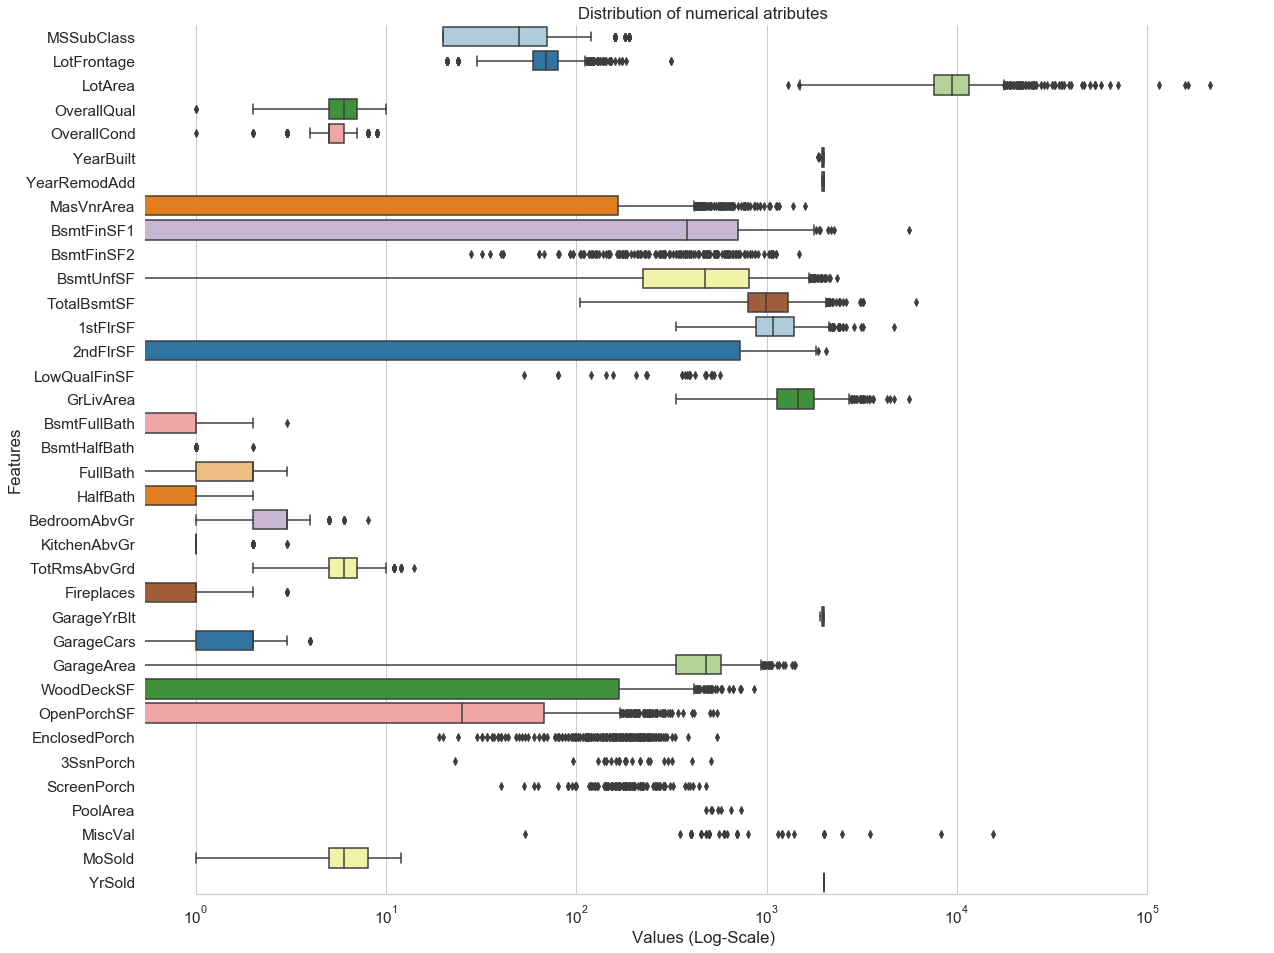

In [186]:
# Another look at the distribution of numerical attribute:

# Creating a list of dataframe columns which are numeric:
num_features = train_df.select_dtypes(include=[np.number]).columns.tolist()

li_not_plot = ['Id', 'SalePrice']
li_plot_num_feats = [c for c in list(num_features) if c not in li_not_plot]


# Boxplot for the numerical features against the target sales price variable:

sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(20, 16))
# Using log scale:
ax.set_xscale("log")
ax = sns.boxplot(data=train_df[li_plot_num_feats] , orient="h", palette="Paired")
ax.set(ylabel="Features")
ax.set(xlabel="Values (Log-Scale)")
ax.set(title="Distribution of numerical atributes")
sns.despine(trim=True, left=True)

In [187]:
# We can find many outliers in the dataset
# Because of so many variables the plot looks little clumsy, so we will take fewer variables at a time.

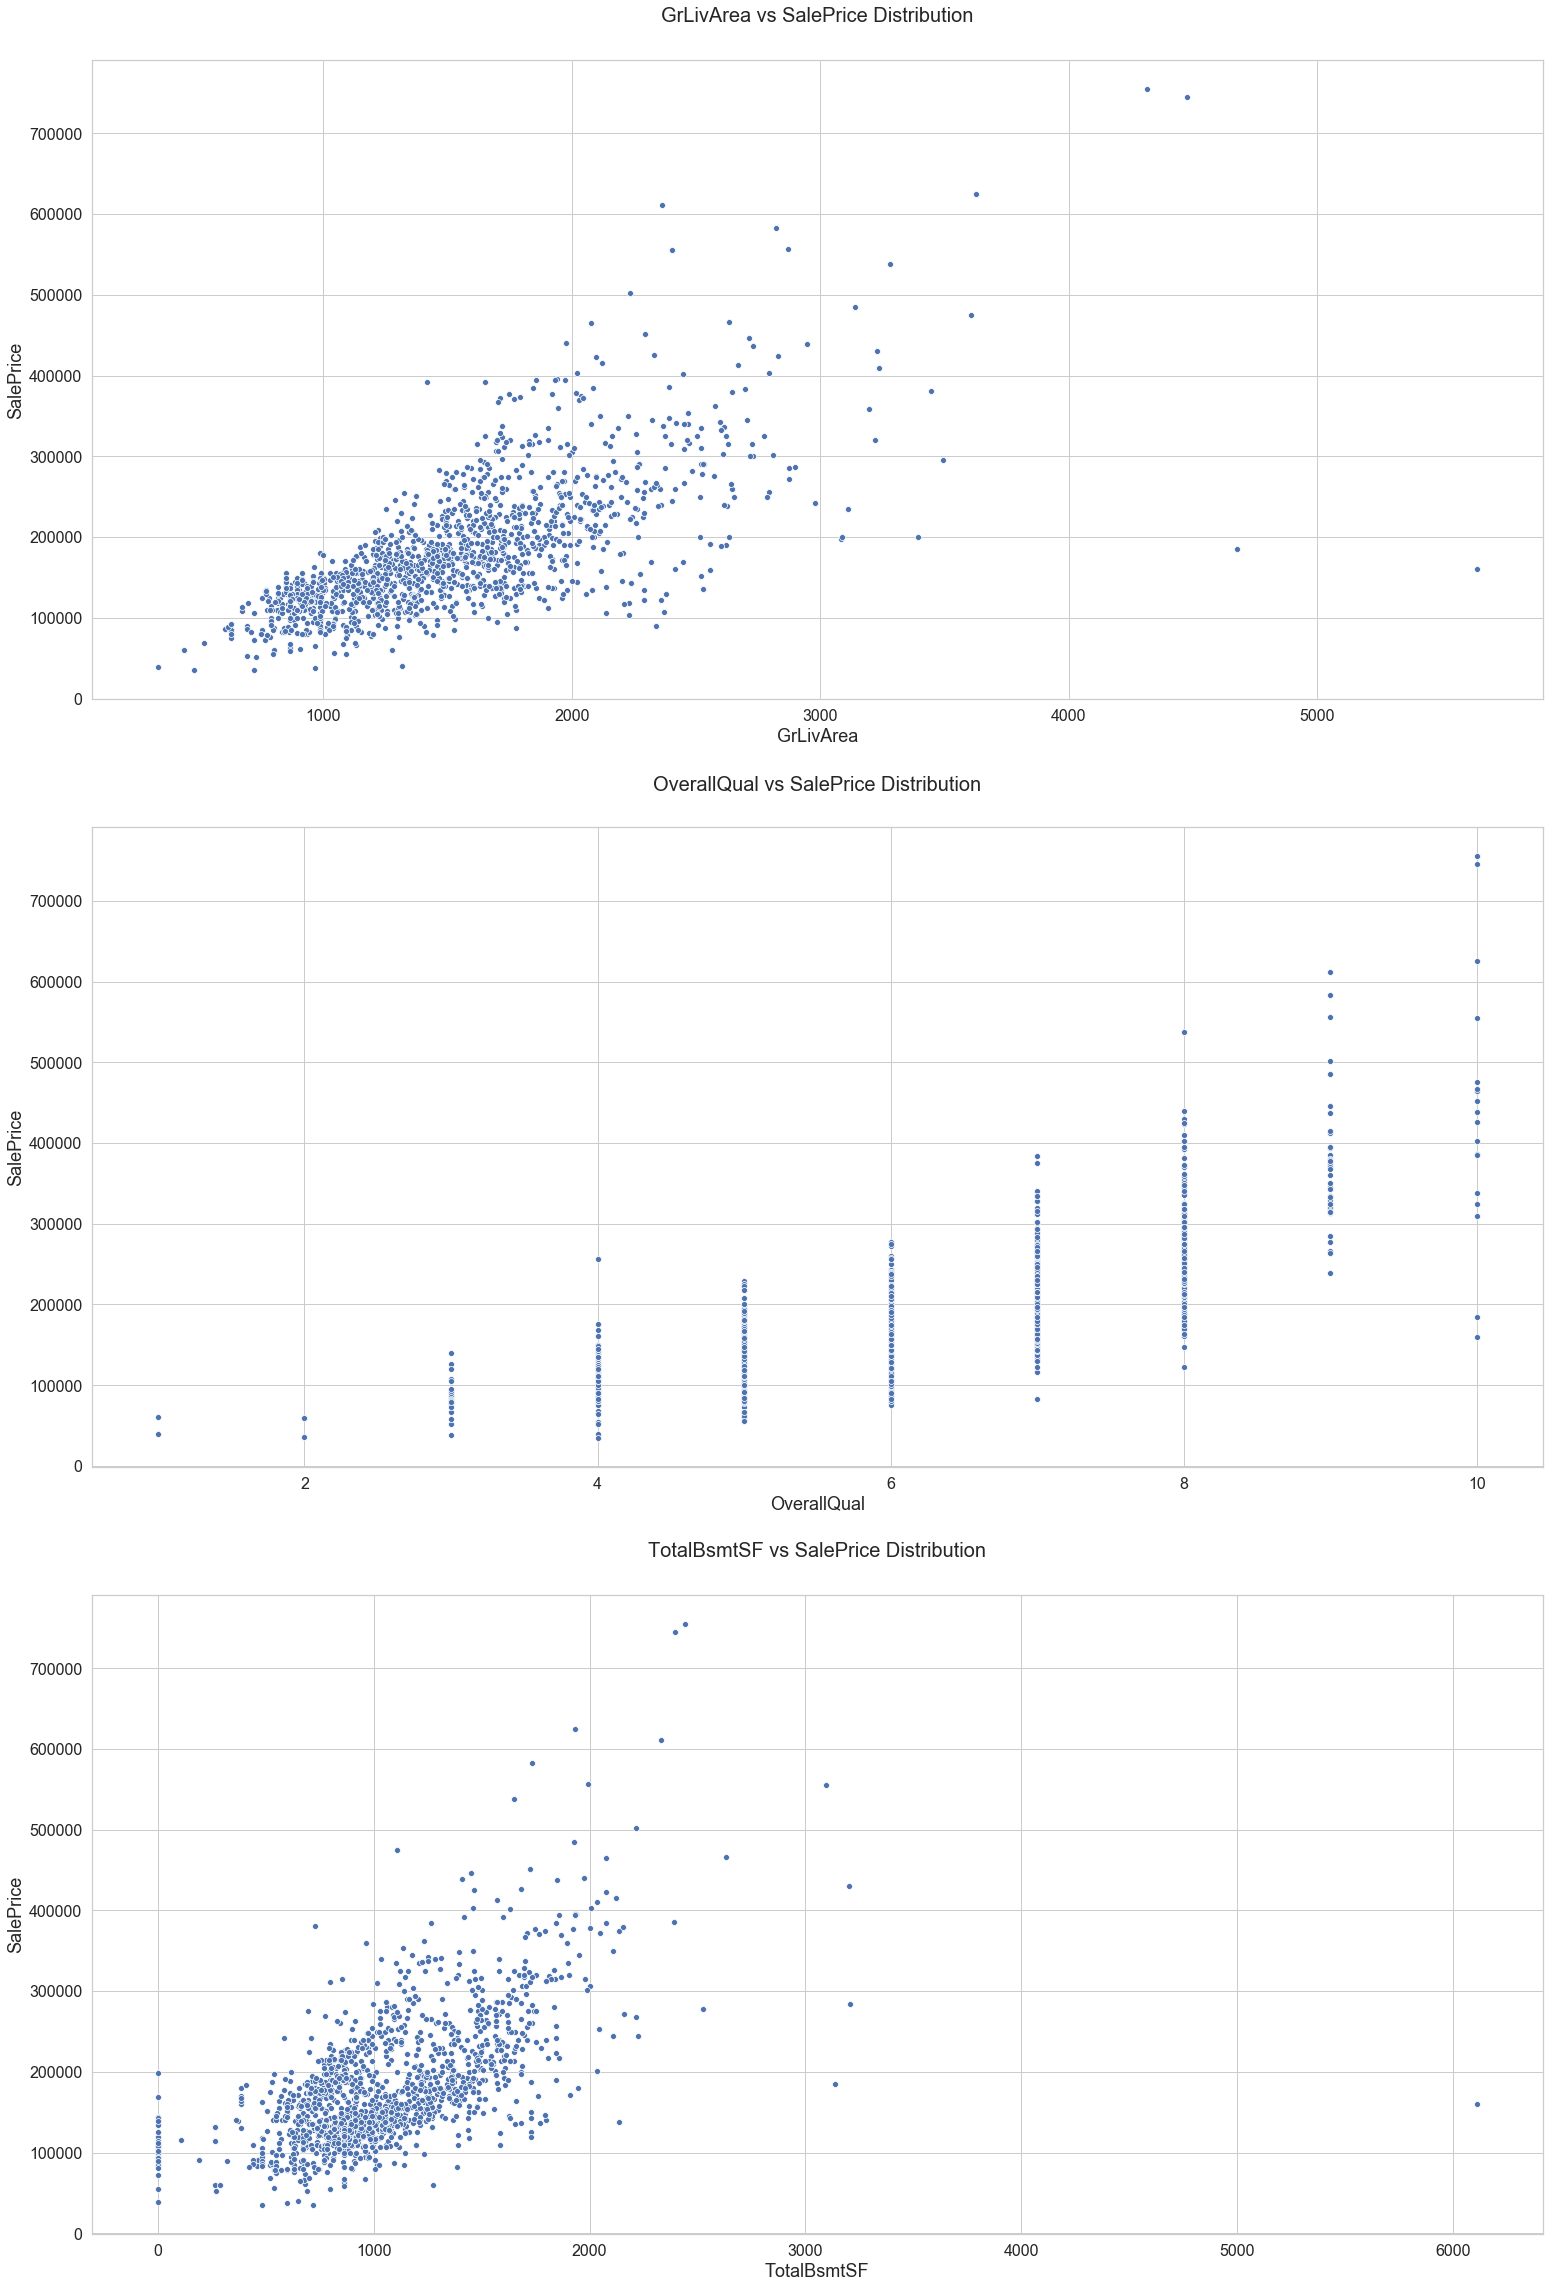

In [188]:
# Outlier Treatment:

# let's start with important features like GrLivArea, TotalBsmtSF OverallQual having strong correlation(>0.6) with the target variable
# SalePrice:

fig = plt.figure(figsize=(26, 40))
cmap = sns.color_palette('Set2')

# PLot the relation between the variables:

plt.subplot(3,1,1)
sns.scatterplot(x=train_df['GrLivArea'], y='SalePrice', palette='Blues_d', data=train_df)
plt.xlabel('GrLivArea', size=18)
plt.ylabel('SalePrice', size=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16) 
plt.title('GrLivArea vs SalePrice Distribution', size=20, y=1.05)

plt.subplot(3,1,2)
sns.scatterplot(x=train_df['OverallQual'], y='SalePrice', palette='Blues_d', data=train_df)
plt.xlabel('OverallQual', size=18)
plt.ylabel('SalePrice', size=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16) 
plt.title('OverallQual vs SalePrice Distribution', size=20, y=1.05)

plt.subplot(3,1,3)
sns.scatterplot(x=train_df['TotalBsmtSF'], y='SalePrice', palette='Blues_d', data=train_df)
plt.xlabel('TotalBsmtSF', size=18)
plt.ylabel('SalePrice', size=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16) 
plt.title('TotalBsmtSF vs SalePrice Distribution', size=20, y=1.05)

plt.show()

In [189]:
# Let's check the shape before outlier treatment:
train_df.shape

(1460, 80)

In [190]:
# From above distribution we can clearly identify that  for "GrLivArea": Above grade (ground) living area square feet, there
# are few outlier data-point as the sales-price is unusually lower for such a big area:

train_df.drop(train_df[np.logical_and(train_df['GrLivArea']>4000, train_df['SalePrice']<200000)].index, inplace=True)

# Similarly, for OverallQual feature few house have overall quality level 10 and are sold for very less price :
# And house price higher for less than 5 rating: 
train_df.drop(train_df[np.logical_and(train_df['OverallQual'] < 5, train_df['SalePrice'] > 200000)].index, inplace=True)

# Similarly for TotalBsmtSF one of the data-point is having huge area with very less selling price, lets eliminate the same:
train_df.drop(train_df[np.logical_and(train_df['TotalBsmtSF']>6000, train_df['SalePrice']<200000)].index, inplace=True)


train_df = train_df.reset_index(drop = True)

# Let's check the shape after outlier treatment:
train_df.shape

(1457, 80)

In [191]:
# So we have eliminated total 3 outliers datapoints from our housing data-set.

### Understanding correlation in the dataset:

In [192]:
# Finding the initial full correlation in the dataset:

# correlation matrix
cor = train_df.corr()
cor

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.405399 -0.140383     0.031645    -0.059065   
LotFrontage     -0.405399     1.000000  0.388580     0.235266    -0.056437   
LotArea         -0.140383     0.388580  1.000000     0.096627    -0.003883   
OverallQual      0.031645     0.235266  0.096627     1.000000    -0.090121   
OverallCond     -0.059065    -0.056437 -0.003883    -0.090121     1.000000   
YearBuilt        0.027426     0.116552  0.009222     0.571290    -0.375483   
YearRemodAdd     0.040783     0.081427  0.006218     0.550766     0.074507   
MasVnrArea       0.022449     0.163938  0.086819     0.403187    -0.126540   
BsmtFinSF1      -0.073578     0.146986  0.171918     0.224468    -0.043435   
BsmtFinSF2      -0.065815     0.055306  0.115912    -0.058674     0.040113   
BsmtUnfSF       -0.141304     0.139980 -0.001108     0.308537    -0.136566   
TotalBsmtSF     -0.252859     0.322824  0.223168     0.539912    -0.175170   
1stFlrSF        -0.261951     0.406946  0.267096     0.471179    -0.145170   
2ndFlrSF         0.308344     0.066185  0.043684     0.289516     0.030720   
LowQualFinSF     0.046427     0.041701  0.005933    -0.030279     0.025447   
GrLivArea        0.076980     0.355459  0.233553     0.590215    -0.077508   
BsmtFullBath     0.003964     0.076826  0.144872     0.105312    -0.053991   
BsmtHalfBath    -0.002453    -0.005051  0.051119    -0.039719     0.117747   
FullBath         0.131241     0.196322  0.123579     0.547982    -0.193284   
HalfBath         0.177041     0.042378  0.009691     0.269940    -0.059788   
BedroomAbvGr    -0.024106     0.273832  0.124326     0.100611     0.013382   
KitchenAbvGr     0.281703    -0.003934 -0.016271    -0.184448    -0.087120   
TotRmsAbvGrd     0.040158     0.336210  0.177524     0.420640    -0.055704   
Fireplaces      -0.044797     0.245636  0.256806     0.395684    -0.023009   
GarageYrBlt      0.084414     0.060709 -0.029492     0.546222    -0.323629   
GarageCars      -0.040072     0.293489  0.152545     0.601566    -0.185372   
GarageArea      -0.099658     0.322919  0.163948     0.557968    -0.150584   
WoodDeckSF      -0.012068     0.081603  0.166675     0.238114    -0.002947   
OpenPorchSF     -0.005832     0.116992  0.058137     0.299074    -0.030185   
EnclosedPorch   -0.012220     0.015230 -0.015536    -0.113647     0.070221   
3SsnPorch       -0.043895     0.074539  0.021851     0.030894     0.025458   
ScreenPorch     -0.026174     0.046278  0.046395     0.066070     0.054706   
PoolArea         0.008054     0.116320  0.036921     0.044727     0.002338   
MiscVal         -0.007729     0.004992  0.039590    -0.031355     0.068754   
MoSold          -0.014329     0.026139  0.009476     0.071339    -0.003415   
YrSold          -0.021309     0.007813 -0.014203    -0.026452     0.043761   
SalePrice       -0.083758     0.370584  0.267179     0.797639    -0.078223   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass      0.027426      0.040783    0.022449   -0.073578   -0.065815   
LotFrontage     0.116552      0.081427    0.163938    0.146986    0.055306   
LotArea         0.009222      0.006218    0.086819    0.171918    0.115912   
OverallQual     0.571290      0.550766    0.403187    0.224468   -0.058674   
OverallCond    -0.375483      0.074507   -0.126540   -0.043435    0.040113   
YearBuilt       1.000000      0.592385    0.312678    0.250669   -0.048803   
YearRemodAdd    0.592385      1.000000    0.175886    0.122673   -0.067295   
MasVnrArea      0.312678      0.175886    1.000000    0.240021   -0.071648   
BsmtFinSF1      0.250669      0.122673    0.240021    1.000000   -0.049355   
BsmtFinSF2     -0.048803     -0.067295   -0.071648   -0.049355    1.000000   
BsmtUnfSF       0.148596      0.181223    0.114154   -0.522060   -0.209438   
TotalBsmtSF     0.400682      0.294789    0.344093    0.467300    0.114465   
1stFlrSF        0.281994      0.2385

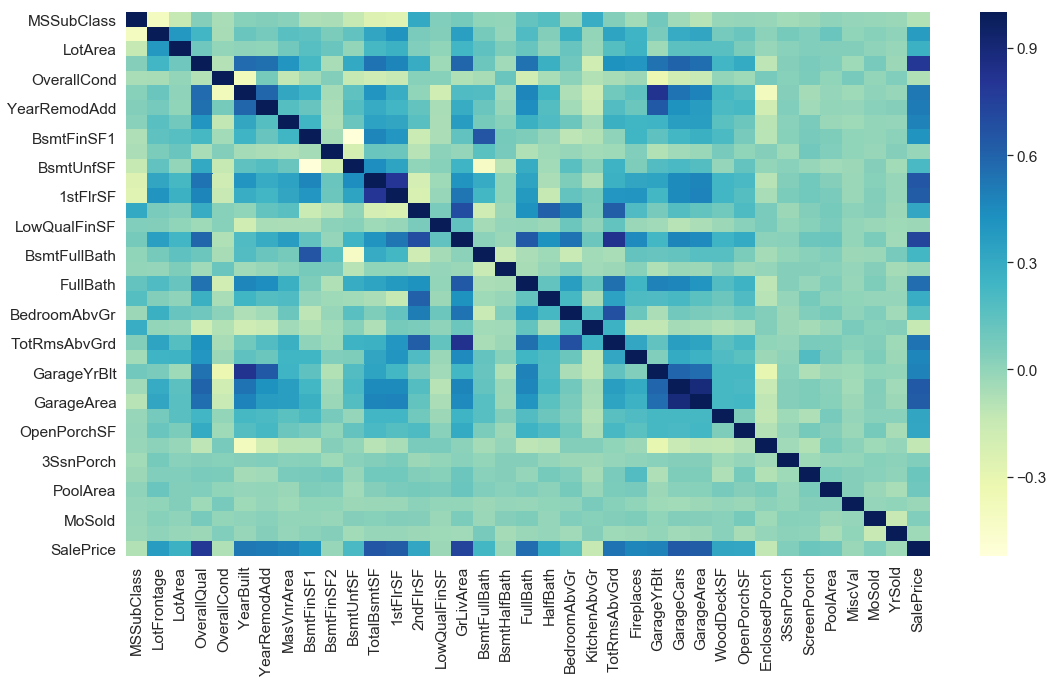

In [193]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(18,10))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=False)
plt.show()


In [194]:
# It is very hard to interpret the correlation as of this stage, because of so many numercial features present in the dataset

In [195]:
# Understanding more on the correlation in data:
print("Most important features relative to target variable sales price")

corr_initial = train_df.corr()['SalePrice']
# convert series to dataframe so it can be sorted
corr_initial = pd.DataFrame(corr_initial)
# correct column label from SalePrice to correlation
corr_initial.columns = ["Correlation"]
# sort correlation
corr_initial2 = corr_initial.sort_values(by=['Correlation'], ascending=False)
corr_initial2.head(15)

Most important features relative to target variable sales price


Correlation
SalePrice        1.000000
OverallQual      0.797639
GrLivArea        0.735021
TotalBsmtSF      0.650991
GarageCars       0.641062
1stFlrSF         0.631243
GarageArea       0.629252
FullBath         0.563205
TotRmsAbvGrd     0.538157
YearBuilt        0.524197
YearRemodAdd     0.507618
GarageYrBlt      0.488114
MasVnrArea       0.483300
Fireplaces       0.469358
BsmtFinSF1       0.408838

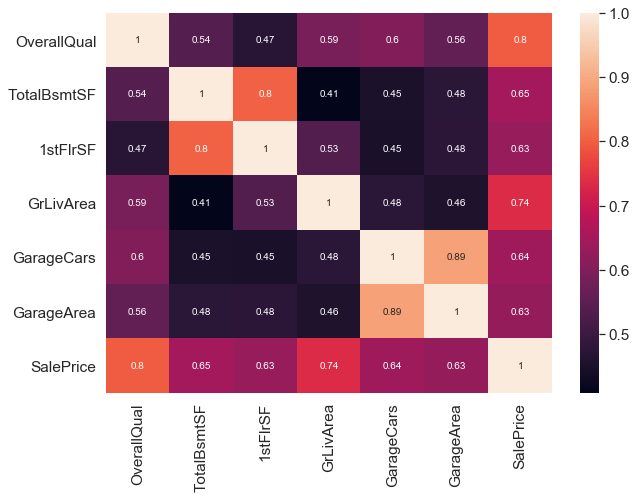

In [196]:
# Lets plot the heatmap again for only strong correlation (i.e. >0.6) with the target variable:

top_feature = cor.index[abs(cor['SalePrice']>0.6)]
plt.subplots(figsize=(10, 7))
top_corr = train_df[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

In [197]:
# So we have top 15 correaltion with the target variable Sales Price as above and OverallQual, GrLivArea, TotalBsmtSF features
# seems to be top 3 important features from the initial analysis.



### Understanding the target variable "Sales Price":

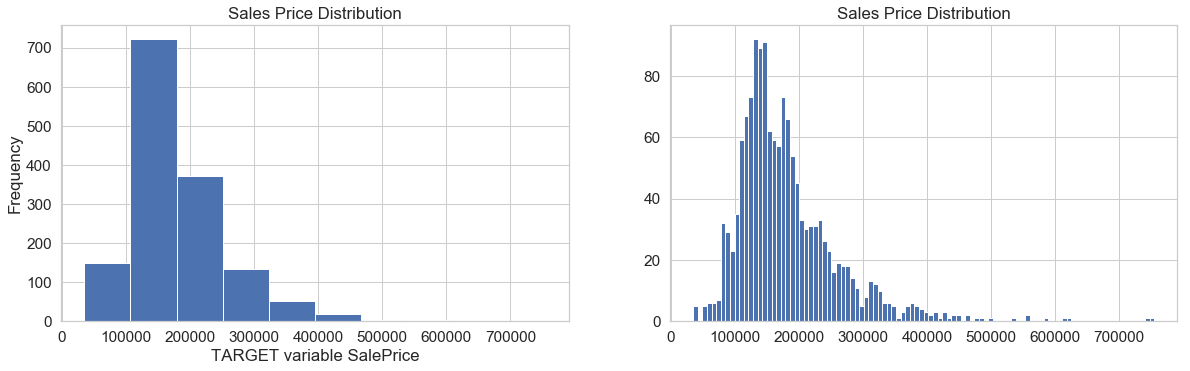

In [198]:
# Plotting the information for visualisation wrt to target variable in absolute terms:

# Since this column is only in the train-data we will be using the same:
plt.figure(figsize=(20, 12))

plt.subplot(2,2,1)
plt.title('Sales Price Distribution')
train_df['SalePrice'].astype(int).plot.hist();
plt.xlabel("TARGET variable SalePrice")
#plt.ylabel("Frequency")

plt.subplot(2,2,2)
plt.title('Sales Price Distribution')
sns.set()
plt.hist(train_df['SalePrice'],bins=100)
plt.show()

In [199]:
# As per the data that we have in hand for the target variable, sale price is nearly normallly distributed with mean close to
# 18000 i.e. most of the house have the price around the mean.

# We also observe that the data given is positively skewed and having positive kurtosis as well.
print("Skewness of target variable wihout transformation: %f" % train_df['SalePrice'].skew())
print("Kurtosis of target variable wihout transformation: %f" % train_df['SalePrice'].kurt())

# The value closer to 0 for the skewness and kurtosis is better 
# The target variable needs transformation to remove skewness.

Skewness of target variable wihout transformation: 1.883749
Kurtosis of target variable wihout transformation: 6.532570


Skewness of transformed target variable: 0.123045
Kurtosis of transformed target variable: 0.807618


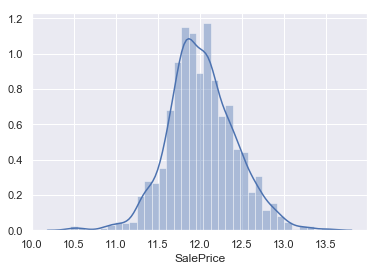

In [200]:
# Performing log transformation 
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])

# re-checkig the variable after transformation:
sns.distplot(train_df['SalePrice'], hist=True)

print("Skewness of transformed target variable: %f" % train_df['SalePrice'].skew())
print("Kurtosis of transformed target variable: %f" % train_df['SalePrice'].kurt())

In [201]:
# So the target variable "SalePrice" skewness is removed now after transformation and it is nearly normally distributed now.
# The skewed and long tailed distribution of the SalePrice is solved by applying log(1 + x) transformation. 
# This transformation reduced skewness from 1.88 to 0.12 and reduced kurtosis from 6.53 to 0.80.

In [202]:
# let's first concatenate the train and test data in the same dataframe:
# Now let's combine the test and train data to perform the EDA on the data-set :

ntrain = train_df.shape[0]
ntest = test_df.shape[0]
y_train_initial = train_df.SalePrice.values
housing_df = pd.concat((train_df, test_df)).reset_index(drop=True)


In [203]:
# Plots of relation to target for all numerical features:

nr_rows = 12
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

li_num_feats = list(num_features)

# Skipping Id is as its just a number and SalesPrice itself is a target variable 
li_not_plot = ['Id', 'SalePrice']
li_plot_num_feats = [c for c in list(num_features) if c not in li_not_plot]


# Using pearson coefficient:
for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_plot_num_feats):
            sns.regplot(housing_df[li_plot_num_feats[i]], housing_df['SalePrice'], ax = axs[r][c])
            stp = stats.pearsonr(housing_df[li_plot_num_feats[i]], housing_df['SalePrice'])
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
plt.show()   

In [204]:
# Inference:
# We see that for some features like 'OverallQual' there is a strong linear correlation (0.79) to the target.
# For other features like 'MSSubClass','MoSold' the correlation is very weak.

# For reference "r" in the plot represents the correlation and p is the p-value which is significance of the variable.

In [205]:
# Plot of the categorical features distribution:

housing_cat_var_list = housing_df.select_dtypes(exclude=[np.number]).columns.tolist()

fig, axs = plt.subplots(ncols=2, nrows=22, figsize=(16, 120))
plt.subplots_adjust(right=1.5, top=1.5)

for i, feature in enumerate(housing_cat_var_list, 1):    
    plt.subplot(22, 2, i)
    sns.set(font_scale = 1.4)
    sns.countplot(x=feature, data=housing_df, palette='Set1')
        
    plt.xlabel('{}'.format(feature), size=25)
    plt.ylabel('Count', size=26)
            
plt.show()


In [206]:
# Plot of relation between qualitative (categorical) variable and the target variable (SalePrice):

housing_cat_var = housing_df.select_dtypes(exclude=[np.number]).columns

# Creating boxplot with the target variable:        
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(housing_df, id_vars=['SalePrice'], value_vars=housing_cat_var)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice", color = 'husl')



In [207]:
# housing_df.drop(['SalePrice'], axis=1, inplace=True)

# Examining the dataset imported:
print("Full housing_df size is : {}".format(housing_df.shape))

Full housing_df size is : (2916, 80)


### Missing value treatment :

In [208]:
#Finding the null percentage of the data set for all columns:
#(Find the percentage of missing values for all the columns)

# creating a function to identify the missing data in dataset:

def missing_data(data):
    #total = data.isnull().sum().sort_values(ascending = False)
    percent = round((data.isnull().sum()/data.isnull().count()*100),2).sort_values(ascending = False)
    countmissing = data.isnull().sum().sort_values(ascending=False)
    return pd.concat([countmissing, percent], axis=1, keys=['Missing Value Count','Percent Missing'])


In [209]:
missing_data(housing_df).head(35)

Missing Value Count  Percent Missing
PoolQC                       2907            99.69
MiscFeature                  2811            96.40
Alley                        2718            93.21
Fence                        2345            80.42
SalePrice                    1459            50.03
FireplaceQu                  1420            48.70
LotFrontage                   485            16.63
GarageQual                    159             5.45
GarageYrBlt                   159             5.45
GarageFinish                  159             5.45
GarageCond                    159             5.45
GarageType                    157             5.38
BsmtCond                       82             2.81
BsmtExposure                   82             2.81
BsmtQual                       81             2.78
BsmtFinType2                   80             2.74
BsmtFinType1                   79             2.71
MasVnrType                     24             0.82
MasVnrArea                     23             0.79
MSZoning                        4             0.14
BsmtHalfBath                    2             0.07
Utilities                       2             0.07
Functional                      2             0.07
BsmtFullBath                    2             0.07
Electrical                      1             0.03
Exterior2nd                     1             0.03
KitchenQual                     1             0.03
GarageCars                      1             0.03
Exterior1st                     1             0.03
GarageArea                      1             0.03
TotalBsmtSF                     1             0.03
BsmtUnfSF                       1             0.03
BsmtFinSF2                      1             0.03
BsmtFinSF1                      1             0.03
SaleType                        1             0.03

#### So we have 35 columns out of 80 columns where values are missing.

Let's visualise the missing values in the data-set.



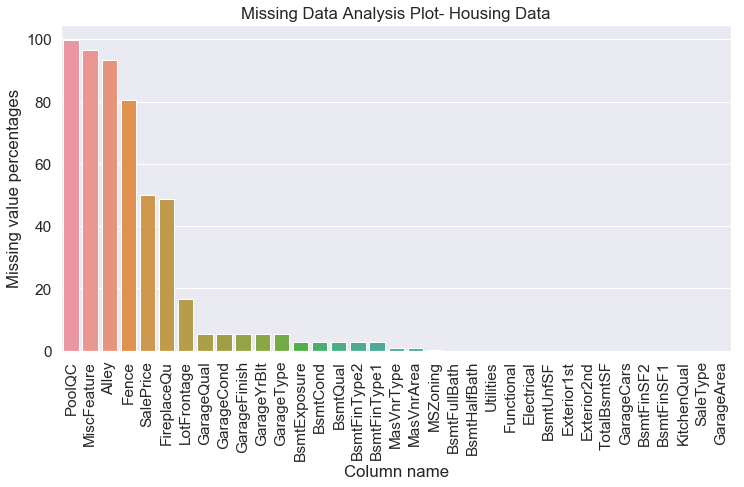

In [210]:
missing_data_df = (housing_df.isnull().sum() / len(housing_df)) * 100
missing_data_df = missing_data_df.drop(missing_data_df[missing_data_df == 0].index).sort_values(ascending=False)
#plt.title("Missing Values Visualisation")
plt.figure(figsize=(12, 6))
plt.xticks(rotation="90")
plt.title('Missing Data Analysis Plot- Housing Data')
plt.xlabel("Column name")
plt.ylabel("Missing value percentages")
sns.barplot(x=missing_data_df.index, y=missing_data_df)
plt.show()

In [211]:
# Converting the NULL,NA missing values etc. to numpy nan as we will use it for the data cleaning:
housing_df = housing_df.replace([' ','NULL','NA'],np.nan)

# We will be proceeding with the missing value treatment on the order of the highest to lowest missing values.
# Also we will ignore the 

In [212]:
# We can see that few of the features like PoolQC, Alley, Fence etc, are having more than 90 % of missing values.
# It does not makes sense to keep this columns in our model as they are not reliable and imputation is not recommended in such 
# scenarios.

# Dropping NULL columns based on more than 90 percentage missing values:
thresh = len(housing_df) * .1
housing_df.dropna(thresh = thresh, axis = 1, inplace = True)

In [213]:
# The data points where more than 50 percent of values are missing will not be adding value to our data-set. 
# Lets remove them: 
# Dropping rows where more than 50 percentage of values are missing:

housing_df = housing_df.dropna(thresh=len(housing_df.columns)*0.5)

In [214]:
# Lets create functions to deal with null values :

# Looking at categorical values
def feature_exploration(column):
    return housing_df[column].value_counts()

# Imputing the missing values
def feature_imputation(column, value):
    housing_df.loc[housing_df[column].isnull(),column] = value

In [215]:
# FireplaceQu: Fireplace quality(Categorical variable), currently 47 % values are missing, lets see the details of the
# data spread:
feature_exploration('FireplaceQu')

Gd    741
TA    592
Fa     74
Po     46
Ex     43
Name: FireplaceQu, dtype: int64

In [216]:
# From the data definition we know that "NA" for the FirePlace means No FirePlace , so we can replace it by None
feature_imputation('FireplaceQu', 'None')

In [217]:
# Most of house are having the street are of around 70 feet

In [218]:
# LotFrontage: Linear feet of street connected to property (Numerical Variable), currently 17 % are missing values
# We will be imputing them with the median of the observations Neighborhood:

housing_df["LotFrontage"] = housing_df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

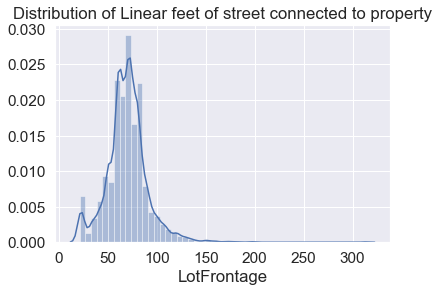

In [219]:
# Distribution of Linear feet of street connected to property:

plt.figure(figsize=(6,4))
plt.title("Distribution of Linear feet of street connected to property")
ax = sns.distplot(housing_df["LotFrontage"])

In [220]:
# Moving ahead wrt GarageType, GarageYrBlt, GarageFinish, GarageCond and GarageQual are attributes related to Garage and all 
# of them are having same percenatge of missing values. This implies that the garrage does not exist in such house.

# GarageYrBlt: Year garage was built (Categorical)
# GarageType: Garage location (Categorical)
# GarageFinish: Interior finish of the garage(Categorical)
# GarageArea: Size of garage in square feet (Numerical)
# GarageQual: Garage quality(Categorical)

# As per Data definition NA in these fields means no garage

#GarageFinish: NA means "None"
#GarageQual: NA means "None"
#GarageCond: NA means "None"
#GarageYrBlt: NA means 0
#GarageType: NA means "None"

Garage_List1 = ['GarageFinish','GarageQual','GarageCond','GarageType']

# Updating garage categorical missing values with "None":
for feature in Garage_List1:
     housing_df[feature].fillna('None',inplace=True)
        
# Similarly since no Garage means the Garage was never built, so replacing these numercial feature with 0:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    housing_df[col] = housing_df[col].fillna(0)

In [221]:
# BsmtFinType2 : Rating of basement finished area (if multiple types)
# BsmtExposure : Refers to walkout or garden level walls
# BsmtQual: Evaluates the height of the basement
# BsmtFinType1: Rating of basement finished area
# BsmtCond: Evaluates the general condition of the basement

# All 5 are again basement categorcial features with the same missing values percentages, so "NA" implies no basement for
# these houses
# Lets impute them with "None" for now:


# Both are categorical basement feature with same missing percenatges , "NA" means no basement so lets impute them with "None":
feature_imputation('BsmtFinType2','None')
feature_imputation('BsmtExposure','None')
feature_imputation('BsmtQual','None')
feature_imputation('BsmtFinType1','None')
feature_imputation('BsmtCond','None')

In [222]:
# Similarly, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : missing values are likely zero for having 
# no basement

for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    housing_df[col] = housing_df[col].fillna(0)

In [223]:
# MasVnrType: Masonry veneer type (Categorical)
# MasVnrArea: Masonry veneer area in square feet (Numerical)

# Missing values in those features mean that there is no masonry veneer in those houses.

# So we have most of the feature value as None (864) for this and very small 0.55 % data is missing , lets impute with None
# and 0:
feature_imputation('MasVnrType','None')
feature_imputation('MasVnrArea',0)

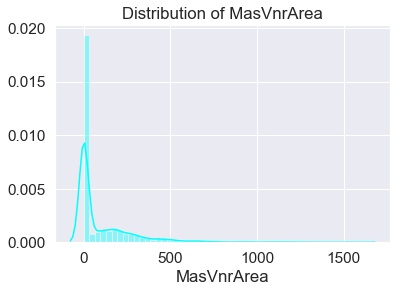

In [224]:
plt.figure(figsize=(6,4))
plt.title("Distribution of MasVnrArea")
ax = sns.distplot(housing_df["MasVnrArea"].astype(int),color='cyan')

In [225]:
# Looks like highest most of houses does not have masonry veneer

In [226]:
# MSZoning : Identifies the general zoning classification of the sale.

# Lets see its distribution:
feature_exploration('MSZoning')

RL         2262
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [227]:
# So we can fill in missing values with 'RL' i.e. mode:
housing_df['MSZoning'] = housing_df.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

In [228]:
# Utilities: Type of utilities available
feature_exploration('Utilities')

AllPub    2913
NoSeWa       1
Name: Utilities, dtype: int64

In [229]:
# Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with
# 'NoSewa' is in the training set, this feature won't help in prediction at ll . We can then safely remove it. 

housing_df.drop(['Utilities'], axis=1, inplace=True)

In [230]:
# Functional : Home functionality 

# Lets see its distribution:
feature_exploration('Functional')

Typ     2715
Min2      70
Min1      64
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [231]:
# data description says NA means typical (Assume typical unless deductions are warranted):
housing_df['Functional'] = housing_df['Functional'].fillna('Typ')

In [232]:
# Electrical: Electrical system (Categorical)
feature_exploration('Electrical')


SBrkr    2668
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [233]:
# This is having missing information with only 1 house, lets impute the same with mode (most found value):

housing_df['Electrical'] = housing_df['Electrical'].fillna(housing_df['Electrical']).mode()[0]

In [234]:
# KitchenQual: Kitchen quality

feature_exploration('KitchenQual')


TA    1492
Gd    1150
Ex     203
Fa      70
Name: KitchenQual, dtype: int64

In [235]:
#  Only one NA value, We set 'TA' (which is the most frequent) for the missing value in KitchenQual
housing_df['KitchenQual'] = housing_df['KitchenQual'].fillna(housing_df['KitchenQual'].mode()[0])

In [236]:
# SaleType: Type of sale

# Lets see its distribution:
feature_exploration('SaleType')

WD       2524
New       237
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [237]:
# Exterior1st: Exterior covering on house
# Exterior2nd : Exterior covering on house (if more than one material)
# SaleType: Type of sale

# Replacing them with mode:

housing_df['Exterior1st'] = housing_df['Exterior1st'].fillna(housing_df['Exterior1st'].mode()[0]) 
housing_df['Exterior2nd'] = housing_df['Exterior2nd'].fillna(housing_df['Exterior2nd'].mode()[0])
housing_df['SaleType'] = housing_df['SaleType'].fillna(housing_df['SaleType'].mode()[0])


In [238]:
#Fence : data description says NA means "no fence"

housing_df["Fence"] = housing_df["Fence"].fillna("None")

In [239]:
# Let's re-look at missing data in dataset :
missing_data(housing_df).head(5)

Missing Value Count  Percent Missing
SalePrice                   1459            50.03
Foundation                     0             0.00
ExterCond                      0             0.00
ExterQual                      0             0.00
Exterior1st                    0             0.00

In [240]:
# So we have completed the task of NULL value treatement/imputation for the given dataset.
# We dont have any missing value in the dataset.

### Performing Feature Engineering:

In [241]:
housing_df.shape
# It has 2916 rows and 76 columns (features as of now)

(2916, 76)

In [ ]:
# We will be performing some creative engineering to create new features from existing ones:

# Total Square Footage (TotalSF) : Total sum of area available with each house :
housing_df['TotalSF'] = housing_df['TotalBsmtSF'] + housing_df['1stFlrSF'] + housing_df['2ndFlrSF']

# Total Living Area divided by LotArea:
housing_df['PercentLivingtoLot'] = housing_df['TotalSF'] / housing_df['LotArea']
    
# Total Number of Bathrooms available with the house:
housing_df['TotalBath'] = housing_df['FullBath'] + (0.5 * housing_df['HalfBath']) + housing_df['BsmtFullBath'] + (0.5 * housing_df['BsmtHalfBath'])   
    
# get current year 
current_year = datetime.datetime.now().year    

# Create new feature to identify time in years since last remodel(or construction) was done on house:
housing_df['YearSinceLastRemodel'] = current_year - ((housing_df['YearRemodAdd'] - housing_df['YearBuilt']) + housing_df['YearBuilt'])

# Age of house :
housing_df['house_age'] = housing_df['YrSold'] - housing_df['YearBuilt']


# Creating new binary features to understand if the house has the desired facility available or not:
housing_df['HasPool'] = housing_df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
housing_df['Has2ndFloor'] = housing_df['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
housing_df['HasGarage'] = housing_df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
housing_df['HasBsmt'] = housing_df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
housing_df['HasFireplace'] = housing_df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
    

In [ ]:
# Lets see if we need to change the datatype of any column:

# We can observe that few numerical features are actually categorical, lets change their datatypes:

# MSSubClass: Identifies the type of dwelling involved in the sale.
# OverallCond: Rates the overall condition of the house
# MoSold: Month Sold (MM)
# YrSold: Year Sold (YYYY)

features_to_transform_to_string = ['MSSubClass', 'OverallCond', 'YrSold', 'MoSold']

for feature in features_to_transform_to_string:
    housing_df[feature] = housing_df[feature].apply(str)

In [ ]:
housing_df.shape
# It has 2916 rows and 86 columns (features as of now)

(2916, 86)

In [ ]:
# lets see the numerical variables that we have in hand now:
housing_num_var = housing_df.select_dtypes(include=[np.number]).columns
housing_num_var_df = housing_df[housing_num_var]
housing_cat_var = housing_df.select_dtypes(exclude=[np.number]).columns
housing_cat_var_df = housing_df[housing_cat_var]
# housing_num_var_df.head()
housing_num_var

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MasVnrArea', 'MiscVal', 'OpenPorchSF',
       'OverallQual', 'PoolArea', 'SalePrice', 'ScreenPorch', 'TotRmsAbvGrd',
       'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'TotalSF',
       'PercentLivingtoLot', 'TotalBath', 'YearSinceLastRemodel', 'house_age',
       'HasPool', 'Has2ndFloor', 'HasGarage', 'HasBsmt', 'HasFireplace'],
      dtype='object')

In [ ]:
# lets see the categorical variables that we have in hand now:

#housing_cat_var_df.head()
housing_cat_var

Index(['BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical',
       'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence',
       'FireplaceQu', 'Foundation', 'Functional', 'GarageCond', 'GarageFinish',
       'GarageQual', 'GarageType', 'Heating', 'HeatingQC', 'HouseStyle',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape',
       'MSSubClass', 'MSZoning', 'MasVnrType', 'MoSold', 'Neighborhood',
       'OverallCond', 'PavedDrive', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       'SaleType', 'Street', 'YrSold'],
      dtype='object')

In [ ]:
# We will focus on the variables having stronger correlation with the target variable first and higher significance:

# Also, many statistical analyses require an assumption of normality, such as analysis of variance(ANOVA) test.So
# transformations are used to make data approximately normal. We will be using the transfromation for our use case.
# We will use transformation mechanism if needed later like BoxCox or Log Transformation

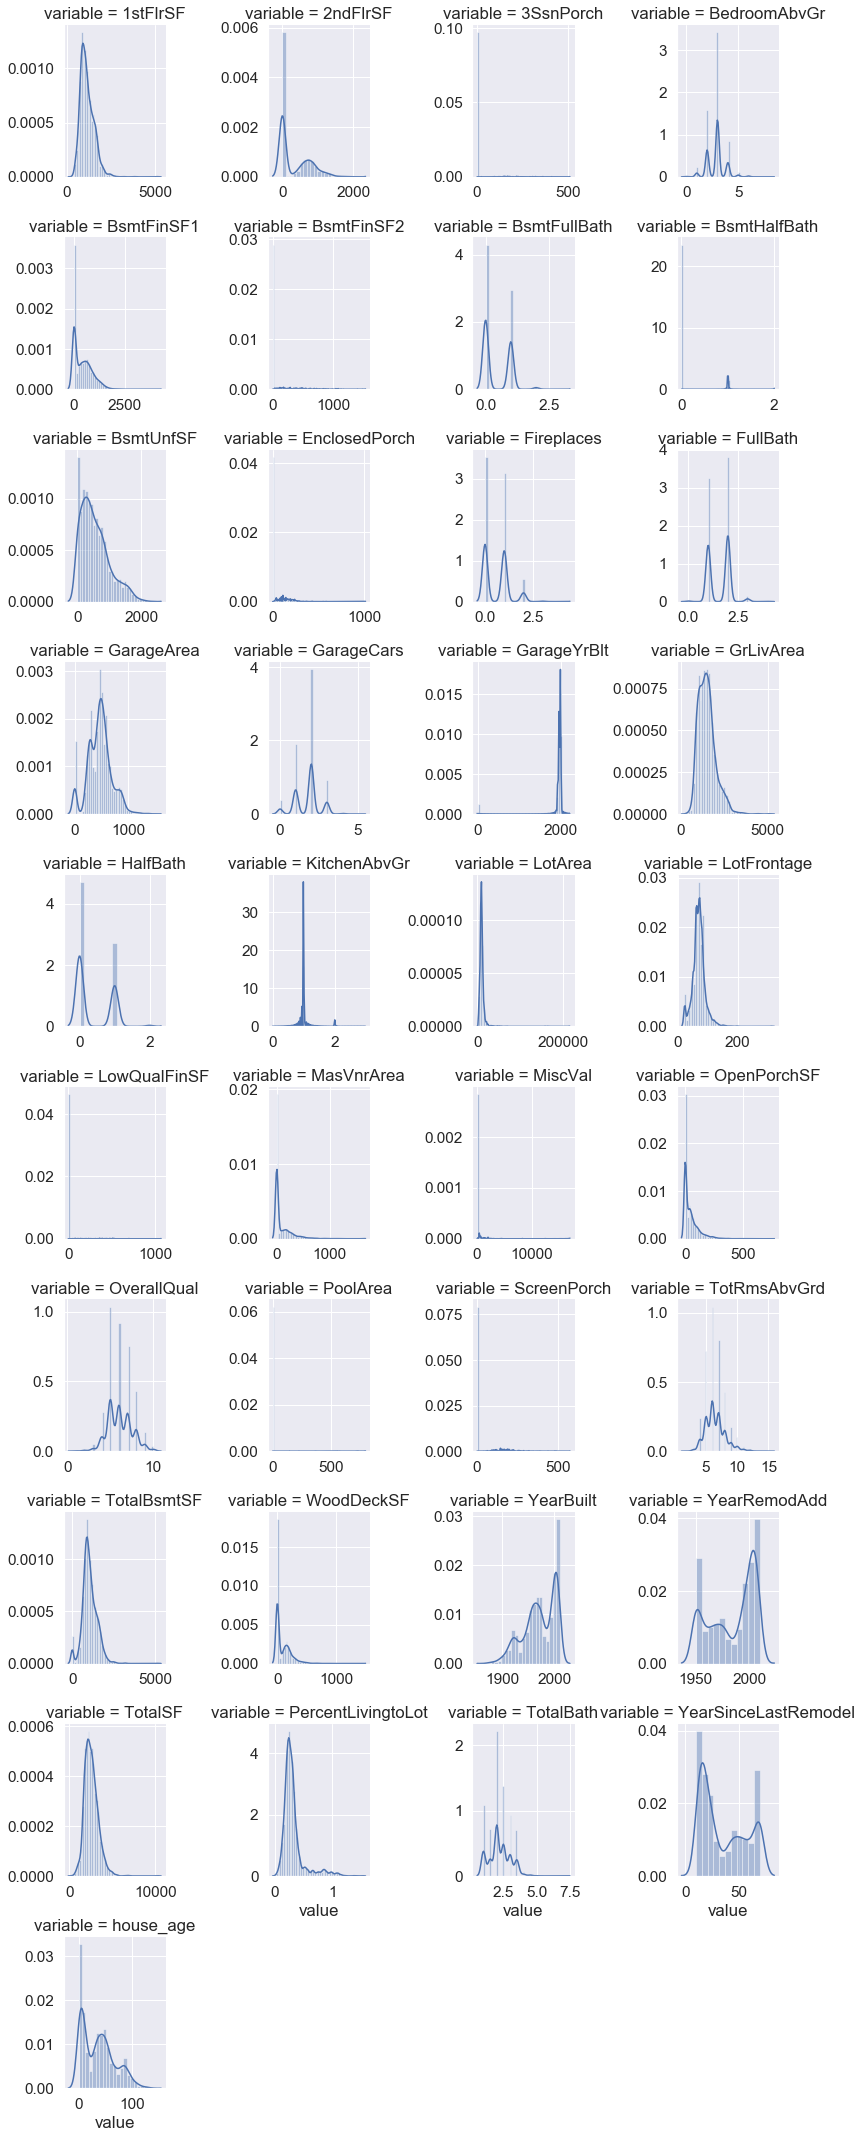

In [ ]:
# Lets have a look at the feature variable distribution to understand if we need to perform variable transformation is needed
# for them or not:

# Selecting only numerical feature from the dataframe:
numeric_features = housing_df.select_dtypes(include=[np.number]).columns.tolist()

# Exclusing few binary features, target features as already transformed and Id as its just for numering:
li_not_plot = ['Id', 'SalePrice','HasPool','Has2ndFloor','HasGarage','HasBsmt','HasFireplace']
li_transform_num_feats = [c for c in list(numeric_features) if c not in li_not_plot]

# Plotting the distribution of the quantative variables:
f = pd.melt(housing_df, value_vars=li_transform_num_feats)
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")


In [ ]:
# As we can see that most of the variables does not follow normal distribution and are skewed, so we need to apply 
# transformation to them.

# Let's find out the numerical feature variables variables which needs to be transformed by considering cut-off as 0.5:

# Identifying high skewed features:
high_skewed_features = housing_df[li_transform_num_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

# Defining cut-off of 0.5 for skewness:
norm_target_features = high_skewed_features[high_skewed_features > 0.75]
norm_target_index = norm_target_features.index

print("{} numerical features needs transformation in the dataset :".format(norm_target_features.shape[0]))
skewness = pd.DataFrame({'Skew' :norm_target_features})
norm_target_features.head(20)

21 numerical features needs transformation in the dataset :


MiscVal               21.935910
PoolArea              17.685603
LotArea               13.262550
LowQualFinSF          12.082427
3SsnPorch             11.370087
KitchenAbvGr           4.299698
BsmtFinSF2             4.143683
EnclosedPorch          4.001570
ScreenPorch            3.944305
BsmtHalfBath           3.929197
MasVnrArea             2.621183
OpenPorchSF            2.531807
PercentLivingtoLot     2.474456
WoodDeckSF             1.846168
1stFlrSF               1.258759
LotFrontage            1.103492
GrLivArea              1.068956
TotalSF                1.009740
BsmtFinSF1             0.982003
BsmtUnfSF              0.919162
dtype: float64

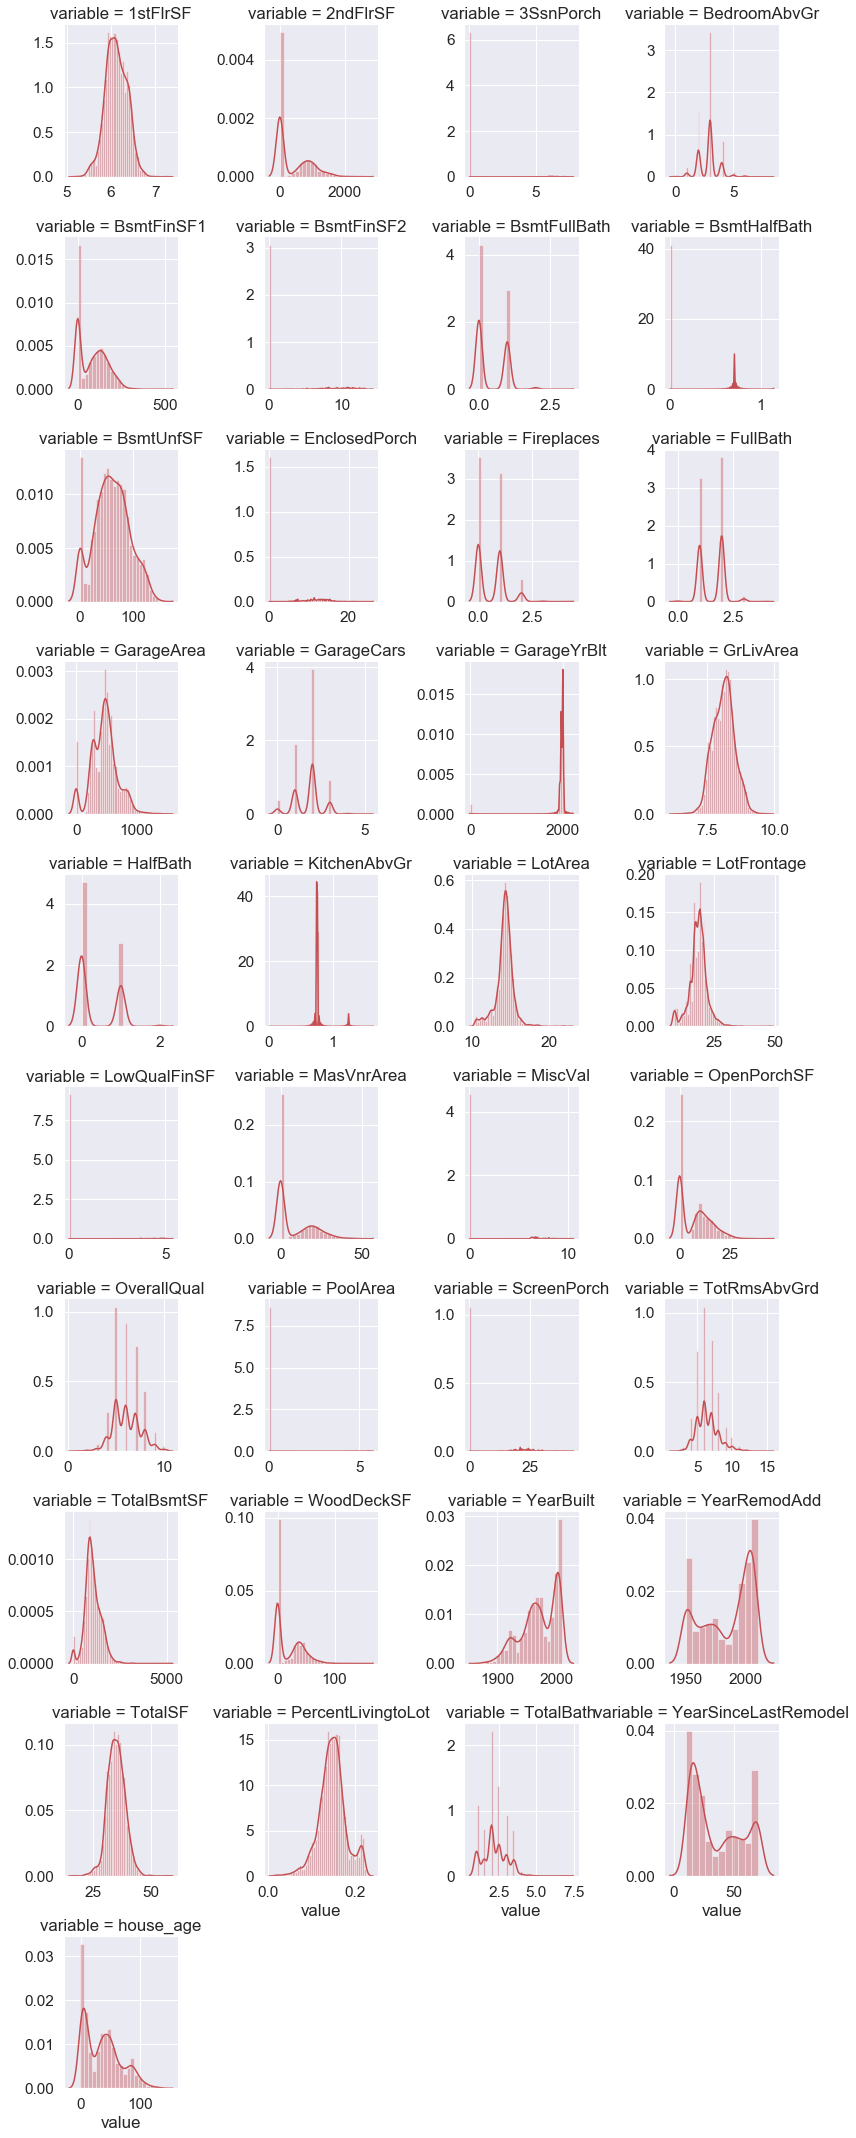

In [ ]:
# We will be using the boxcox transformation for the numeric features which needs normalization as they work good with both
# positive and negative values of the numerical variable:

# Normalizing with Box Cox Transformation:
for i in norm_target_index:
    housing_df[i] = boxcox1p(housing_df[i], boxcox_normmax(housing_df[i] + 1))
    
# Lets re-check the skewness after the transformation through the plot:
f = pd.melt(housing_df, value_vars=li_transform_num_feats)
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, "value", color="r")

In [ ]:
# So the skewness is removed upto much extent now and data is more of normalised now for these features.

In [ ]:
# Let's re-check the data-frame that we have:
housing_df.head()

1stFlrSF     2ndFlrSF  3SsnPorch  BedroomAbvGr BldgType BsmtCond  \
0  5.929136  1026.391730        0.0             3     1Fam       TA   
1  6.224032     0.000000        0.0             3     1Fam       TA   
2  5.984244  1041.273333        0.0             3     1Fam       TA   
3  6.017495   905.116133        0.0             3     1Fam       Gd   
4  6.150533  1273.976065        0.0             4     1Fam       TA   

  BsmtExposure  BsmtFinSF1  BsmtFinSF2 BsmtFinType1      ...         TotalSF  \
0           No  143.920039         0.0          GLQ      ...       35.500630   
1           Gd  181.454691         0.0          ALQ      ...       35.296991   
2           Mn  110.299845         0.0          GLQ      ...       36.163499   
3           No   61.728757         0.0          ALQ      ...       35.046597   
4           Av  136.439658         0.0          GLQ      ...       38.916087   

   PercentLivingtoLot  TotalBath YearSinceLastRemodel  house_age HasPool  \
0            0.157130        3.5                   17          5       0   
1            0.146420        2.5                   44         31       0   
2            0.139703        3.5                   18          7       0   
3            0.145276        2.0                   50         91       0   
4            0.137757        3.5                   20          8       0   

  Has2ndFloor HasGarage HasBsmt  HasFireplace  
0           1         1       1             0  
1           0         1       1             1  
2           1         1       1             1  
3           1         1       1             1  
4           1         1       1             1  

[5 rows x 86 columns]

In [ ]:
# Creating copy of the house pricing data-frame for performing the multiple linear regressions, lasso and ridge:

housing_price_mlr_df = housing_df
housing_price_ridge_df = housing_df
housing_price_lasso_df = housing_df

## Step2 : Model Building :

### We will be building 3 models for our assignment for same data to compare the performance:
1. Multiple Linear Regression model using RFE.
2. Linear Regression model using Ridge.
3. Linear Regression model using Lasso.



### 2. 1  : Multiple Linear Regression model using RFE:

In [ ]:
# So we have the required data in the below dataframe:
housing_price_mlr_df.shape


(2916, 86)

In [ ]:
# Checking the data in the data frame for the LR:
housing_price_mlr_df.head()

1stFlrSF     2ndFlrSF  3SsnPorch  BedroomAbvGr BldgType BsmtCond  \
0  5.929136  1026.391730        0.0             3     1Fam       TA   
1  6.224032     0.000000        0.0             3     1Fam       TA   
2  5.984244  1041.273333        0.0             3     1Fam       TA   
3  6.017495   905.116133        0.0             3     1Fam       Gd   
4  6.150533  1273.976065        0.0             4     1Fam       TA   

  BsmtExposure  BsmtFinSF1  BsmtFinSF2 BsmtFinType1      ...         TotalSF  \
0           No  143.920039         0.0          GLQ      ...       35.500630   
1           Gd  181.454691         0.0          ALQ      ...       35.296991   
2           Mn  110.299845         0.0          GLQ      ...       36.163499   
3           No   61.728757         0.0          ALQ      ...       35.046597   
4           Av  136.439658         0.0          GLQ      ...       38.916087   

   PercentLivingtoLot  TotalBath YearSinceLastRemodel  house_age HasPool  \
0            0.157130        3.5                   17          5       0   
1            0.146420        2.5                   44         31       0   
2            0.139703        3.5                   18          7       0   
3            0.145276        2.0                   50         91       0   
4            0.137757        3.5                   20          8       0   

  Has2ndFloor HasGarage HasBsmt  HasFireplace  
0           1         1       1             0  
1           0         1       1             1  
2           1         1       1             1  
3           1         1       1             1  
4           1         1       1             1  

[5 rows x 86 columns]

In [ ]:
# creating dummy variables for categorical variables

# subset all categorical variables
house_categorical = housing_price_mlr_df.select_dtypes(include=['object'])
house_categorical.head()


BldgType BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 BsmtQual  \
0     1Fam       TA           No          GLQ          Unf       Gd   
1     1Fam       TA           Gd          ALQ          Unf       Gd   
2     1Fam       TA           Mn          GLQ          Unf       Gd   
3     1Fam       Gd           No          ALQ          Unf       TA   
4     1Fam       TA           Av          GLQ          Unf       Gd   

  CentralAir Condition1 Condition2 Electrical  ...   MoSold Neighborhood  \
0          Y       Norm       Norm      SBrkr  ...        2      CollgCr   
1          Y      Feedr       Norm      SBrkr  ...        5      Veenker   
2          Y       Norm       Norm      SBrkr  ...        9      CollgCr   
3          Y       Norm       Norm      SBrkr  ...        2      Crawfor   
4          Y       Norm       Norm      SBrkr  ...       12      NoRidge   

  OverallCond PavedDrive RoofMatl RoofStyle SaleCondition SaleType Street  \
0           5          Y  CompShg     Gable        Normal       WD   Pave   
1           8          Y  CompShg     Gable        Normal       WD   Pave   
2           5          Y  CompShg     Gable        Normal       WD   Pave   
3           5          Y  CompShg     Gable       Abnorml       WD   Pave   
4           5          Y  CompShg     Gable        Normal       WD   Pave   

  YrSold  
0   2008  
1   2007  
2   2008  
3   2006  
4   2008  

[5 rows x 43 columns]

In [ ]:
# convert into dummies:

house_dummies = pd.get_dummies(house_categorical, drop_first=True)
house_dummies.head()

BldgType_2fmCon  BldgType_Duplex  BldgType_Twnhs  BldgType_TwnhsE  \
0                0                0               0                0   
1                0                0               0                0   
2                0                0               0                0   
3                0                0               0                0   
4                0                0               0                0   

   BsmtCond_Gd  BsmtCond_None  BsmtCond_Po  BsmtCond_TA  BsmtExposure_Gd  \
0            0              0            0            1                0   
1            0              0            0            1                1   
2            0              0            0            1                0   
3            1              0            0            0                0   
4            0              0            0            1                0   

   BsmtExposure_Mn     ...       SaleType_ConLI  SaleType_ConLw  SaleType_New  \
0                0     ...                    0               0             0   
1                0     ...                    0               0             0   
2                1     ...                    0               0             0   
3                0     ...                    0               0             0   
4                0     ...                    0               0             0   

   SaleType_Oth  SaleType_WD  Street_Pave  YrSold_2007  YrSold_2008  \
0             0            1            1            0            1   
1             0            1            1            1            0   
2             0            1            1            0            1   
3             0            1            1            0            0   
4             0            1            1            0            1   

   YrSold_2009  YrSold_2010  
0            0            0  
1            0            0  
2            0            0  
3            0            0  
4            0            0  

[5 rows x 246 columns]

In [ ]:
# drop categorical variables 
housing_price_mlr_df = housing_price_mlr_df.drop(list(house_categorical.columns), axis=1)

In [ ]:
# concat dummy variables with X
housing_price_mlr_df = pd.concat([housing_price_mlr_df, house_dummies], axis=1)

In [ ]:
# Examining the encoded dataframes(dataset) data:

housing_price_mlr_df.head()

1stFlrSF     2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtFinSF1  BsmtFinSF2  \
0  5.929136  1026.391730        0.0             3  143.920039         0.0   
1  6.224032     0.000000        0.0             3  181.454691         0.0   
2  5.984244  1041.273333        0.0             3  110.299845         0.0   
3  6.017495   905.116133        0.0             3   61.728757         0.0   
4  6.150533  1273.976065        0.0             4  136.439658         0.0   

   BsmtFullBath  BsmtHalfBath  BsmtUnfSF  EnclosedPorch     ...       \
0           1.0      0.000000  30.010266        0.00000     ...        
1           0.0      0.710938  44.168166        0.00000     ...        
2           1.0      0.000000  56.942686        0.00000     ...        
3           1.0      0.000000  64.863761       16.02506     ...        
4           1.0      0.000000  61.217215        0.00000     ...        

   SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0               0             0             0            1   
1               0               0             0             0            1   
2               0               0             0             0            1   
3               0               0             0             0            1   
4               0               0             0             0            1   

   Street_Pave  YrSold_2007  YrSold_2008  YrSold_2009  YrSold_2010  
0            1            0            1            0            0  
1            1            1            0            0            0  
2            1            0            1            0            0  
3            1            0            0            0            0  
4            1            0            1            0            0  

[5 rows x 289 columns]

In [ ]:
# Since all the variables are now numerical, we can proceed with Splitting the first step in ML:

# Splitting the Data into Training and Testing Sets:
#from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively:
#np.random.seed(0)
#df_house_train, df_house_test = train_test_split(housing_price_mlr_df, train_size = 0.7, test_size = 0.3, random_state = 42)

train = housing_price_mlr_df[:ntrain]
test = housing_price_mlr_df[ntrain:]

In [ ]:
# Examining the training dataframes(dataset) data and info:
train.shape

(1457, 289)

In [ ]:
# Examining the test dataframes(dataset) data and info:
test.shape

(1459, 289)

In [ ]:
test.head()

1stFlrSF    2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtFinSF1  BsmtFinSF2  \
1457  5.964059    0.000000        0.0             2  107.369495    7.762052   
1458  6.262998    0.000000        0.0             3  174.142384    0.000000   
1459  5.990851  837.268317        0.0             3  156.044691    0.000000   
1460  5.989205  808.945028        0.0             3  128.482064    0.000000   
1461  6.234708    0.000000        0.0             2   71.099437    0.000000   

      BsmtFullBath  BsmtHalfBath  BsmtUnfSF  EnclosedPorch     ...       \
1457           0.0           0.0  42.845137            0.0     ...        
1458           0.0           0.0  54.719062            0.0     ...        
1459           0.0           0.0  28.393762            0.0     ...        
1460           0.0           0.0  47.805509            0.0     ...        
1461           0.0           0.0  94.402745            0.0     ...        

      SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
1457               0               0             0             0            1   
1458               0               0             0             0            1   
1459               0               0             0             0            1   
1460               0               0             0             0            1   
1461               0               0             0             0            1   

      Street_Pave  YrSold_2007  YrSold_2008  YrSold_2009  YrSold_2010  
1457            1            0            0            0            1  
1458            1            0            0            0            1  
1459            1            0            0            0            1  
1460            1            0            0            0            1  
1461            1            0            0            0            1  

[5 rows x 289 columns]

In [ ]:
# Scaling the test data and training data using the standard scalar:
# Apply scaler() to all the columns except the 'dummy' variables, 'yes-no' and unordered categorical columns:

# Instantiate the scaler:
scaler = StandardScaler()

# apply scaler() to all the numeric columns:
num_vars = [ 'LotFrontage','LotArea','OverallQual','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
              'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath',
              'HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF',
              'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','TotalSF','PercentLivingtoLot',
              'TotalBath','YearSinceLastRemodel','house_age']

train[num_vars] = scaler.fit_transform(train[num_vars])
test[num_vars] = scaler.transform(test[num_vars]) 


train.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'Street_Pave', 'YrSold_2007', 'YrSold_2008',
       'YrSold_2009', 'YrSold_2010'],
      dtype='object', length=289)

In [ ]:
# Dividing data into X and y variables for model building:

y_train = train.pop('SalePrice')
X_train = train

In [ ]:
# Using Recursive Feature Elimination (RFE) of scikilt learn library to perform automated course feature selection:

lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE and taking top 30 feature for our model building:
rfe = RFE(lm, 30)            
rfe = rfe.fit(X_train, y_train)

In [ ]:
# Ranking of the column by RFE for feature importance:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('3SsnPorch', False, 212),
 ('BedroomAbvGr', False, 177),
 ('BsmtFinSF1', False, 203),
 ('BsmtFinSF2', False, 119),
 ('BsmtFullBath', False, 73),
 ('BsmtHalfBath', False, 80),
 ('BsmtUnfSF', False, 41),
 ('EnclosedPorch', False, 152),
 ('Fireplaces', False, 156),
 ('FullBath', False, 79),
 ('GarageArea', False, 99),
 ('GarageCars', False, 45),
 ('GarageYrBlt', False, 258),
 ('GrLivArea', False, 39),
 ('HalfBath', False, 75),
 ('KitchenAbvGr', False, 120),
 ('LotArea', False, 22),
 ('LotFrontage', False, 196),
 ('LowQualFinSF', False, 246),
 ('MasVnrArea', False, 241),
 ('MiscVal', False, 252),
 ('OpenPorchSF', False, 153),
 ('OverallQual', True, 1),
 ('PoolArea', True, 1),
 ('ScreenPorch', False, 112),
 ('TotRmsAbvGrd', False, 257),
 ('TotalBsmtSF', False, 14),
 ('WoodDeckSF', False, 141),
 ('YearBuilt', False, 242),
 ('YearRemodAdd', False, 103),
 ('TotalSF', False, 50),
 ('PercentLivingtoLot', False, 54),
 ('TotalBath', False, 78),
 ('

In [ ]:
# Columns significant according to RFC:
col = X_train.columns[rfe.support_]
col

Index(['1stFlrSF', '2ndFlrSF', 'OverallQual', 'PoolArea', 'HasPool',
       'BldgType_Duplex', 'BsmtExposure_Gd', 'Exterior1st_BrkComm',
       'Functional_Maj2', 'Functional_Mod', 'Functional_Sev', 'GarageCond_Fa',
       'GarageCond_Gd', 'GarageCond_Po', 'GarageCond_TA', 'GarageQual_Fa',
       'GarageQual_Gd', 'GarageQual_Po', 'GarageQual_TA', 'Heating_Grav',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'OverallCond_3',
       'RoofMatl_Membran', 'SaleType_Con'],
      dtype='object')

In [ ]:
# Building model using statsmodel, for the detailed statistics:

# Creating X_test dataframe with RFE selected variables:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

1stFlrSF  2ndFlrSF  OverallQual  PoolArea  HasPool  BldgType_Duplex  \
0 -0.803588  1.160994     0.657759 -0.064295        0                0   
1  0.434252 -0.790571    -0.069369 -0.064295        0                0   
2 -0.572267  1.189290     0.657759 -0.064295        0                0   
3 -0.432698  0.930403     0.657759 -0.064295        0                0   
4  0.125736  1.631747     1.384886 -0.064295        0                0   

   BsmtExposure_Gd  Exterior1st_BrkComm  Functional_Maj2  Functional_Mod  \
0                0                    0                0               0   
1                1                    0                0               0   
2                0                    0                0               0   
3                0                    0                0               0   
4                0                    0                0               0   

       ...       KitchenQual_Fa  KitchenQual_Gd  KitchenQual_TA  MSZoning_FV  \
0      ...                    0               1               0            0   
1      ...                    0               0               1            0   
2      ...                    0               1               0            0   
3      ...                    0               1               0            0   
4      ...                    0               1               0            0   

   MSZoning_RH  MSZoning_RL  MSZoning_RM  OverallCond_3  RoofMatl_Membran  \
0            0            1            0              0                 0   
1            0            1            0              0                 0   
2            0            1            0              0                 0   
3            0            1            0              0                 0   
4            0            1            0              0                 0   

   SaleType_Con  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 30 columns]

In [ ]:
# Model1:

#Build a linear model for all the columns 

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_rfe)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

print(lr_1.summary())

#X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     334.6
Date:                Fri, 21 Feb 2020   Prob (F-statistic):               0.00
Time:                        22:36:34   Log-Likelihood:                 787.63
No. Observations:                1457   AIC:                            -1513.
Df Residuals:                    1426   BIC:                            -1349.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  11.6749    

In [ ]:
# Checking VIF of model1:

#Calculating the Variance Inflation Factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


Features      VIF
4               HasPool  3342.69
3              PoolArea  3333.15
14        GarageCond_TA  1368.22
18        GarageQual_TA  1337.09
15        GarageQual_Fa    50.33
11        GarageCond_Fa    37.49
25          MSZoning_RL    32.18
16        GarageQual_Gd    15.44
22       KitchenQual_TA    12.31
12        GarageCond_Gd    10.47
13        GarageCond_Po     9.28
21       KitchenQual_Gd     7.73
26          MSZoning_RM     6.83
17        GarageQual_Po     4.99
23          MSZoning_FV     2.94
2           OverallQual     2.63
0              1stFlrSF     1.86
20       KitchenQual_Fa     1.76
1              2ndFlrSF     1.41
24          MSZoning_RH     1.41
6       BsmtExposure_Gd     1.21
19         Heating_Grav     1.18
9        Functional_Mod     1.16
5       BldgType_Duplex     1.16
27        OverallCond_3     1.16
7   Exterior1st_BrkComm     1.14
8       Functional_Maj2     1.10
28     RoofMatl_Membran     1.09
10       Functional_Sev     1.01
29         SaleType_Con     1.01

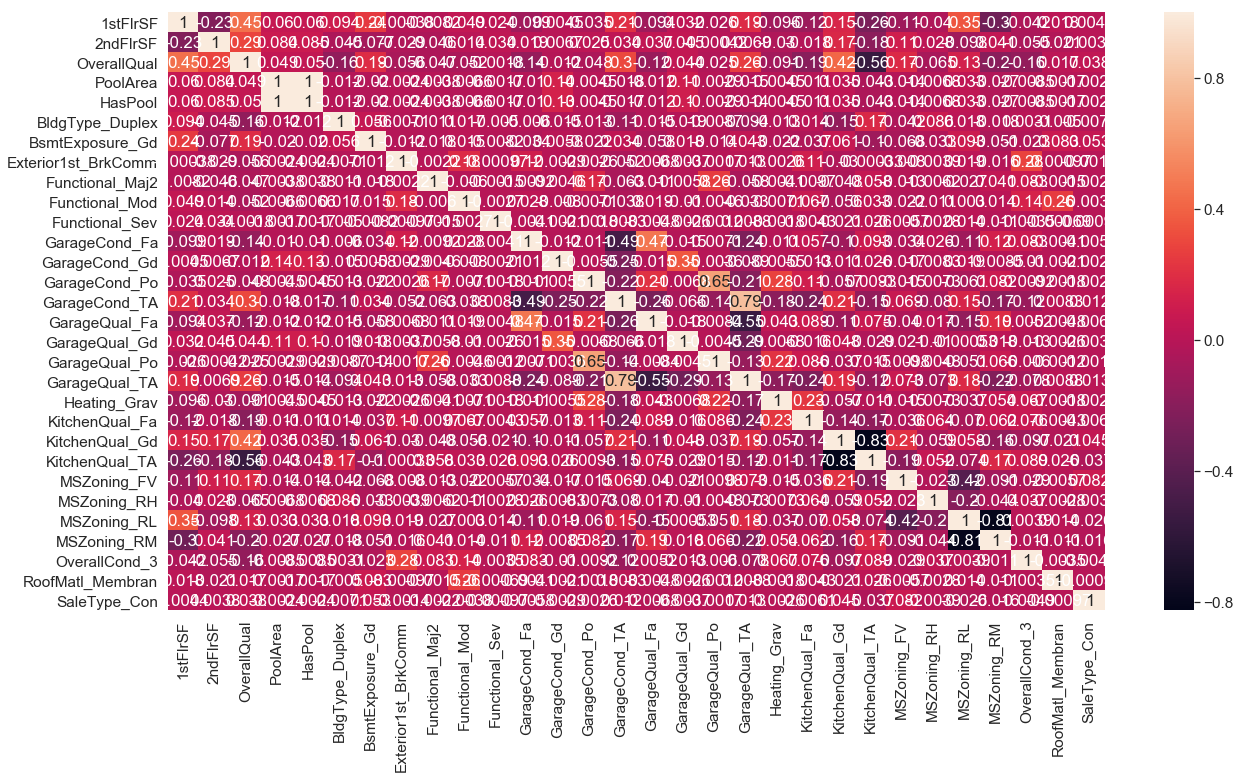

In [ ]:
# Corelation Matrix of Model 1:

plt.figure(figsize = (21,11))  
sns.heatmap(X_train_rfe.corr(),annot = True)

In [ ]:
# As the correlation of HasPool and PoolArea is very high (0.77) , hence VIF is high 3287.62, so we will eliminate 

In [ ]:
X = X_train_rfe.drop(["HasPool"], axis = 1)

In [ ]:
# Model 2:

X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_lm).fit()

print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     345.0
Date:                Fri, 21 Feb 2020   Prob (F-statistic):               0.00
Time:                        22:36:38   Log-Likelihood:                 785.11
No. Observations:                1457   AIC:                            -1510.
Df Residuals:                    1427   BIC:                            -1352.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  11.6429    

In [ ]:
# Checking VIF of model2:

#Calculating the Variance Inflation Factor
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
13        GarageCond_TA  1368.10
17        GarageQual_TA  1337.09
14        GarageQual_Fa    50.33
10        GarageCond_Fa    37.49
24          MSZoning_RL    25.09
15        GarageQual_Gd    15.42
21       KitchenQual_TA    12.20
11        GarageCond_Gd    10.44
12        GarageCond_Po     9.28
20       KitchenQual_Gd     7.70
25          MSZoning_RM     5.48
16        GarageQual_Po     4.99
2           OverallQual     2.63
22          MSZoning_FV     2.55
0              1stFlrSF     1.86
19       KitchenQual_Fa     1.75
1              2ndFlrSF     1.40
23          MSZoning_RH     1.32
5       BsmtExposure_Gd     1.21
18         Heating_Grav     1.18
8        Functional_Mod     1.16
4       BldgType_Duplex     1.16
26        OverallCond_3     1.16
6   Exterior1st_BrkComm     1.14
7       Functional_Maj2     1.10
27     RoofMatl_Membran     1.09
3              PoolArea     1.04
9        Functional_Sev     1.01
28         SaleType_Con     1.01

In [ ]:
# Since the variable GarageCond_TA is having high p-value(2.931) and  high VIF(1359.12), so removing it:

X = X.drop(["GarageCond_TA"], axis = 1)


In [ ]:
# Model 3:

X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     356.7
Date:                Fri, 21 Feb 2020   Prob (F-statistic):               0.00
Time:                        22:36:39   Log-Likelihood:                 783.58
No. Observations:                1457   AIC:                            -1509.
Df Residuals:                    1428   BIC:                            -1356.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  11.6486    

In [ ]:
# Checking VIF of model3:

#Calculating the Variance Inflation Factor

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


Features    VIF
23          MSZoning_RL  24.77
16        GarageQual_TA  18.05
20       KitchenQual_TA  12.19
19       KitchenQual_Gd   7.68
24          MSZoning_RM   5.38
2           OverallQual   2.63
21          MSZoning_FV   2.53
13        GarageQual_Fa   2.10
12        GarageCond_Po   2.05
15        GarageQual_Po   1.96
0              1stFlrSF   1.86
18       KitchenQual_Fa   1.75
10        GarageCond_Fa   1.41
1              2ndFlrSF   1.40
14        GarageQual_Gd   1.36
22          MSZoning_RH   1.31
5       BsmtExposure_Gd   1.21
17         Heating_Grav   1.18
11        GarageCond_Gd   1.17
8        Functional_Mod   1.16
4       BldgType_Duplex   1.16
25        OverallCond_3   1.16
6   Exterior1st_BrkComm   1.14
7       Functional_Maj2   1.10
26     RoofMatl_Membran   1.09
3              PoolArea   1.04
9        Functional_Sev   1.01
27         SaleType_Con   1.01

In [ ]:
# MSZoning_RL is having  hig VIF 24.77, so removing it:

X = X.drop(["MSZoning_RL"], axis = 1)

In [ ]:
# Model 4:

X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     343.4
Date:                Fri, 21 Feb 2020   Prob (F-statistic):               0.00
Time:                        22:36:39   Log-Likelihood:                 735.90
No. Observations:                1457   AIC:                            -1416.
Df Residuals:                    1429   BIC:                            -1268.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  12.0902    

In [ ]:
# Checking VIF of model4:

#Calculating the Variance Inflation Factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
16        GarageQual_TA  10.74
20       KitchenQual_TA   7.77
19       KitchenQual_Gd   5.12
2           OverallQual   2.50
12        GarageCond_Po   2.05
15        GarageQual_Po   1.95
0              1stFlrSF   1.86
13        GarageQual_Fa   1.82
10        GarageCond_Fa   1.41
1              2ndFlrSF   1.40
18       KitchenQual_Fa   1.39
23          MSZoning_RM   1.37
14        GarageQual_Gd   1.29
5       BsmtExposure_Gd   1.21
21          MSZoning_FV   1.19
17         Heating_Grav   1.17
11        GarageCond_Gd   1.17
24        OverallCond_3   1.16
4       BldgType_Duplex   1.15
8        Functional_Mod   1.15
6   Exterior1st_BrkComm   1.14
7       Functional_Maj2   1.10
25     RoofMatl_Membran   1.09
3              PoolArea   1.04
22          MSZoning_RH   1.04
9        Functional_Sev   1.01
26         SaleType_Con   1.01

In [ ]:
# GarageQual_TA is having high VIF(10.74), lets remove it:

X = X.drop(["GarageQual_TA"], axis = 1)

In [ ]:
# Model 5:

X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     342.9
Date:                Fri, 21 Feb 2020   Prob (F-statistic):               0.00
Time:                        22:36:40   Log-Likelihood:                 710.86
No. Observations:                1457   AIC:                            -1368.
Df Residuals:                    1430   BIC:                            -1225.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  12.2034    

In [ ]:
# Checking VIF of model5:

#Calculating the Variance Inflation Factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2           OverallQual  2.20
12        GarageCond_Po  2.04
15        GarageQual_Po  1.93
0              1stFlrSF  1.82
19       KitchenQual_TA  1.58
13        GarageQual_Fa  1.54
10        GarageCond_Fa  1.40
1              2ndFlrSF  1.40
22          MSZoning_RM  1.37
18       KitchenQual_Gd  1.31
5       BsmtExposure_Gd  1.21
20          MSZoning_FV  1.18
16         Heating_Grav  1.17
14        GarageQual_Gd  1.17
17       KitchenQual_Fa  1.17
23        OverallCond_3  1.16
11        GarageCond_Gd  1.16
8        Functional_Mod  1.15
6   Exterior1st_BrkComm  1.14
4       BldgType_Duplex  1.14
7       Functional_Maj2  1.09
24     RoofMatl_Membran  1.09
3              PoolArea  1.04
21          MSZoning_RH  1.04
9        Functional_Sev  1.01
25         SaleType_Con  1.01

In [ ]:
# PoolArea is having high p-value(0.994), lets remove it:

X = X.drop(["PoolArea"], axis = 1)

In [ ]:
# Model 6:

X_train_lm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_lm).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     356.9
Date:                Fri, 21 Feb 2020   Prob (F-statistic):               0.00
Time:                        22:36:40   Log-Likelihood:                 710.86
No. Observations:                1457   AIC:                            -1370.
Df Residuals:                    1431   BIC:                            -1232.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  12.2034    

In [ ]:
# Checking VIF of model6:

#Calculating the Variance Inflation Factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2           OverallQual  2.20
11        GarageCond_Po  2.04
14        GarageQual_Po  1.93
0              1stFlrSF  1.81
18       KitchenQual_TA  1.58
12        GarageQual_Fa  1.54
9         GarageCond_Fa  1.40
1              2ndFlrSF  1.38
21          MSZoning_RM  1.37
17       KitchenQual_Gd  1.31
4       BsmtExposure_Gd  1.20
19          MSZoning_FV  1.18
15         Heating_Grav  1.17
16       KitchenQual_Fa  1.17
13        GarageQual_Gd  1.16
22        OverallCond_3  1.16
10        GarageCond_Gd  1.15
7        Functional_Mod  1.15
5   Exterior1st_BrkComm  1.14
3       BldgType_Duplex  1.14
23     RoofMatl_Membran  1.09
6       Functional_Maj2  1.09
20          MSZoning_RH  1.04
8        Functional_Sev  1.01
24         SaleType_Con  1.01

In [ ]:
# GarageQual_Gd has high p-value(0.944), lets remove it:

X = X.drop(["GarageQual_Gd"], axis = 1)

In [ ]:
# Model 7:

X_train_lm = sm.add_constant(X)

lr_7 = sm.OLS(y_train, X_train_lm).fit()
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     372.0
Date:                Fri, 21 Feb 2020   Prob (F-statistic):               0.00
Time:                        22:36:40   Log-Likelihood:                 710.86
No. Observations:                1457   AIC:                            -1372.
Df Residuals:                    1432   BIC:                            -1240.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  12.2034    

In [ ]:
# Checking VIF of model7:

#Calculating the Variance Inflation Factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2           OverallQual  2.20
11        GarageCond_Po  2.04
13        GarageQual_Po  1.93
0              1stFlrSF  1.81
17       KitchenQual_TA  1.57
12        GarageQual_Fa  1.54
9         GarageCond_Fa  1.40
1              2ndFlrSF  1.38
20          MSZoning_RM  1.37
16       KitchenQual_Gd  1.31
4       BsmtExposure_Gd  1.20
18          MSZoning_FV  1.18
15       KitchenQual_Fa  1.17
14         Heating_Grav  1.17
21        OverallCond_3  1.16
7        Functional_Mod  1.15
5   Exterior1st_BrkComm  1.14
3       BldgType_Duplex  1.14
22     RoofMatl_Membran  1.09
6       Functional_Maj2  1.09
19          MSZoning_RH  1.04
10        GarageCond_Gd  1.01
8        Functional_Sev  1.01
23         SaleType_Con  1.01

In [ ]:
# GarageQual_Po has high p-values(0.812), lets remove:

X = X.drop(["GarageQual_Po"], axis = 1)

In [ ]:
# Model 8:

X_train_lm = sm.add_constant(X)

lr_8 = sm.OLS(y_train, X_train_lm).fit()
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     388.4
Date:                Fri, 21 Feb 2020   Prob (F-statistic):               0.00
Time:                        22:36:41   Log-Likelihood:                 710.83
No. Observations:                1457   AIC:                            -1374.
Df Residuals:                    1433   BIC:                            -1247.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  12.2032    

In [ ]:
# Checking VIF of model8:

#Calculating the Variance Inflation Factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2           OverallQual  2.19
0              1stFlrSF  1.81
16       KitchenQual_TA  1.57
12        GarageQual_Fa  1.46
9         GarageCond_Fa  1.39
1              2ndFlrSF  1.38
19          MSZoning_RM  1.36
15       KitchenQual_Gd  1.31
11        GarageCond_Po  1.21
4       BsmtExposure_Gd  1.20
17          MSZoning_FV  1.18
14       KitchenQual_Fa  1.17
13         Heating_Grav  1.16
20        OverallCond_3  1.16
7        Functional_Mod  1.15
5   Exterior1st_BrkComm  1.14
3       BldgType_Duplex  1.14
21     RoofMatl_Membran  1.09
6       Functional_Maj2  1.05
18          MSZoning_RH  1.04
8        Functional_Sev  1.01
10        GarageCond_Gd  1.01
22         SaleType_Con  1.01

In [ ]:
# GarageCond_Gd is having high p-value(0.604), lets remove:

X = X.drop(["GarageCond_Gd"], axis = 1)

In [ ]:
# Model 9:

X_train_lm = sm.add_constant(X)

lr_9 = sm.OLS(y_train, X_train_lm).fit()
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     406.3
Date:                Fri, 21 Feb 2020   Prob (F-statistic):               0.00
Time:                        22:36:42   Log-Likelihood:                 710.69
No. Observations:                1457   AIC:                            -1375.
Df Residuals:                    1434   BIC:                            -1254.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  12.2032    

In [ ]:
# Checking VIF of model 9:

#Calculating the Variance Inflation Factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2           OverallQual  2.19
0              1stFlrSF  1.81
15       KitchenQual_TA  1.57
11        GarageQual_Fa  1.46
9         GarageCond_Fa  1.39
1              2ndFlrSF  1.38
18          MSZoning_RM  1.36
14       KitchenQual_Gd  1.30
10        GarageCond_Po  1.21
4       BsmtExposure_Gd  1.20
16          MSZoning_FV  1.18
13       KitchenQual_Fa  1.17
12         Heating_Grav  1.16
19        OverallCond_3  1.16
7        Functional_Mod  1.15
5   Exterior1st_BrkComm  1.14
3       BldgType_Duplex  1.14
20     RoofMatl_Membran  1.09
6       Functional_Maj2  1.05
17          MSZoning_RH  1.04
8        Functional_Sev  1.01
21         SaleType_Con  1.01

In [ ]:
# GarageCond_Po is having high p-value(0.307), lets remove the same:

X = X.drop(["GarageCond_Po"], axis = 1)

In [ ]:
# Model 10: 

X_train_lm = sm.add_constant(X)

lr_10 = sm.OLS(y_train, X_train_lm).fit()
print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     425.5
Date:                Fri, 21 Feb 2020   Prob (F-statistic):               0.00
Time:                        22:36:42   Log-Likelihood:                 710.16
No. Observations:                1457   AIC:                            -1376.
Df Residuals:                    1435   BIC:                            -1260.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  12.2028    

In [ ]:
# Checking VIF of model 10:

#Calculating the Variance Inflation Factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2           OverallQual  2.19
0              1stFlrSF  1.81
14       KitchenQual_TA  1.56
10        GarageQual_Fa  1.39
1              2ndFlrSF  1.38
9         GarageCond_Fa  1.37
17          MSZoning_RM  1.36
13       KitchenQual_Gd  1.30
4       BsmtExposure_Gd  1.20
15          MSZoning_FV  1.18
12       KitchenQual_Fa  1.17
18        OverallCond_3  1.16
7        Functional_Mod  1.15
5   Exterior1st_BrkComm  1.14
3       BldgType_Duplex  1.14
19     RoofMatl_Membran  1.09
11         Heating_Grav  1.08
16          MSZoning_RH  1.04
6       Functional_Maj2  1.02
8        Functional_Sev  1.01
20         SaleType_Con  1.01

In [ ]:
# SaleType_Con has high p-value:

X = X.drop(["SaleType_Con"], axis = 1)

In [ ]:
# Model 11: 

X_train_lm = sm.add_constant(X)

lr_11 = sm.OLS(y_train, X_train_lm).fit()
print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     446.7
Date:                Fri, 21 Feb 2020   Prob (F-statistic):               0.00
Time:                        22:36:42   Log-Likelihood:                 709.51
No. Observations:                1457   AIC:                            -1377.
Df Residuals:                    1436   BIC:                            -1266.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  12.2024    

In [ ]:
# Checking VIF of model 11:

#Calculating the Variance Inflation Factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2           OverallQual  2.19
0              1stFlrSF  1.81
14       KitchenQual_TA  1.56
10        GarageQual_Fa  1.39
1              2ndFlrSF  1.38
9         GarageCond_Fa  1.37
17          MSZoning_RM  1.36
13       KitchenQual_Gd  1.30
4       BsmtExposure_Gd  1.20
15          MSZoning_FV  1.18
12       KitchenQual_Fa  1.17
18        OverallCond_3  1.16
7        Functional_Mod  1.15
5   Exterior1st_BrkComm  1.14
3       BldgType_Duplex  1.14
19     RoofMatl_Membran  1.09
11         Heating_Grav  1.08
16          MSZoning_RH  1.04
6       Functional_Maj2  1.02
8        Functional_Sev  1.01

In [ ]:
# RoofMatl_Membran has high p-value:

X = X.drop(["RoofMatl_Membran"], axis = 1)

In [ ]:
# Model 12: 

X_train_lm = sm.add_constant(X)

lr_12 = sm.OLS(y_train, X_train_lm).fit()
print(lr_12.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     469.5
Date:                Fri, 21 Feb 2020   Prob (F-statistic):               0.00
Time:                        22:36:43   Log-Likelihood:                 708.22
No. Observations:                1457   AIC:                            -1376.
Df Residuals:                    1437   BIC:                            -1271.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  12.2015    

In [ ]:
# Checking VIF of model 12:

#Calculating the Variance Inflation Factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2           OverallQual  2.19
0              1stFlrSF  1.80
14       KitchenQual_TA  1.56
10        GarageQual_Fa  1.39
1              2ndFlrSF  1.37
9         GarageCond_Fa  1.37
17          MSZoning_RM  1.36
13       KitchenQual_Gd  1.30
4       BsmtExposure_Gd  1.19
15          MSZoning_FV  1.18
12       KitchenQual_Fa  1.17
18        OverallCond_3  1.16
5   Exterior1st_BrkComm  1.14
3       BldgType_Duplex  1.14
11         Heating_Grav  1.08
7        Functional_Mod  1.07
16          MSZoning_RH  1.04
6       Functional_Maj2  1.02
8        Functional_Sev  1.01

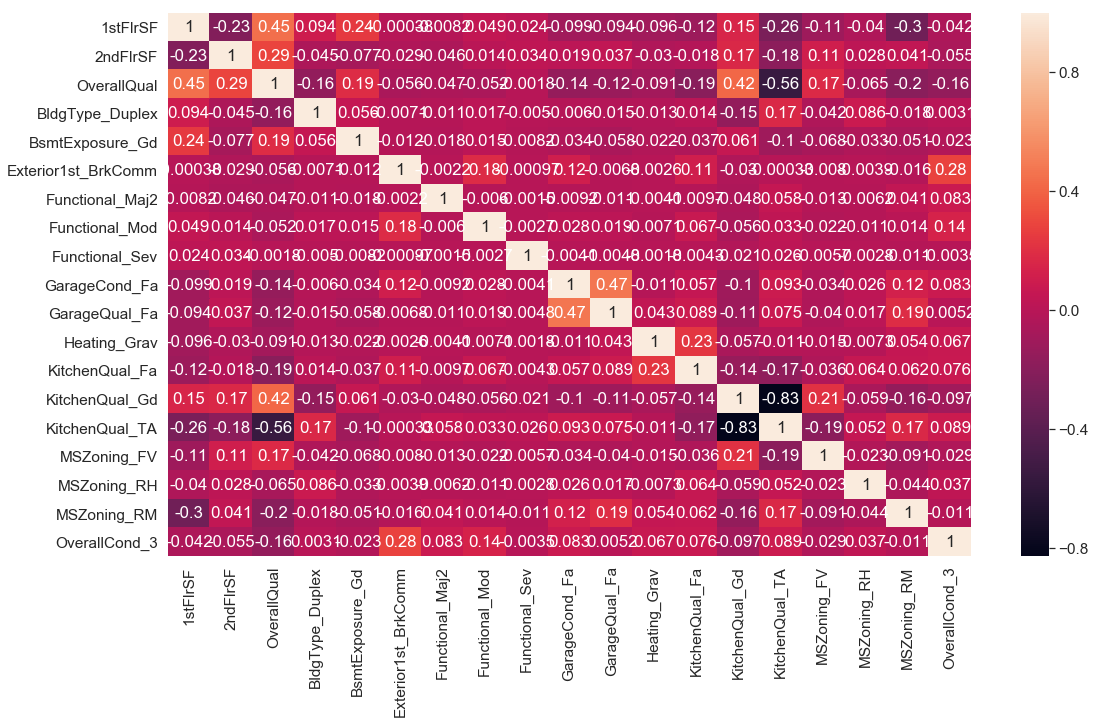

In [ ]:
# Final correlation matrix of the model:

plt.figure(figsize = (18,10))  
sns.heatmap(X.corr(),annot = True)

Text(0.5, 0, 'Errors')

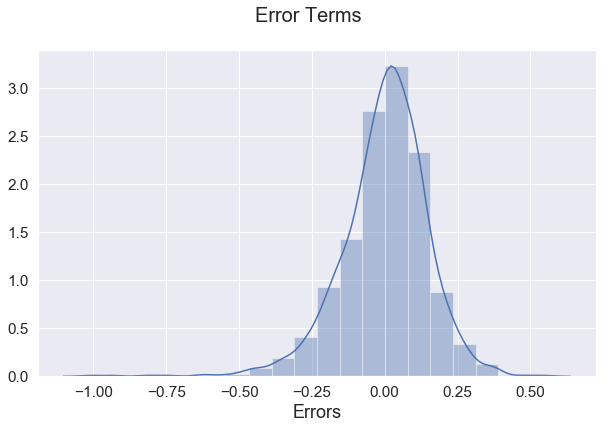

In [ ]:
# Residual Analysis of the train data:

# So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear 
# regression), let us plot the histogram of the error terms and see what it looks like.

# Importing the required libraries for plots.

%matplotlib inline

y_train_predict = lr_12.predict(X_train_lm)

# Plot the histogram of the error terms
fig = plt.figure(figsize = (10,6))
sns.distplot((y_train - y_train_predict), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [ ]:
# Inferences:

# Error terms seem to be approximately normally distributed, so the assumption on the linear modeling seems to be fulfilled
# for our model.

In [ ]:
# Making Predictions Using the Final Model:

# Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions 
# using the final, i.e. 10th model.


In [ ]:
# checking train data:
train.head()

1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtFinSF1  BsmtFinSF2  \
0 -0.803588  1.160994  -0.128401      0.163173    0.727983   -0.351013   
1  0.434252 -0.790571  -0.128401      0.163173    1.217105   -0.351013   
2 -0.572267  1.189290  -0.128401      0.163173    0.289871   -0.351013   
3 -0.432698  0.930403  -0.128401      0.163173   -0.343069   -0.351013   
4  0.125736  1.631747  -0.128401      1.388653    0.630504   -0.351013   

   BsmtFullBath  BsmtHalfBath  BsmtUnfSF  EnclosedPorch     ...       \
0      1.114743     -0.243105  -0.935035      -0.397024     ...        
1     -0.818805      4.013257  -0.502888      -0.397024     ...        
2      1.114743     -0.243105  -0.112967      -0.397024     ...        
3      1.114743     -0.243105   0.128811       3.213548     ...        
4      1.114743     -0.243105   0.017506      -0.397024     ...        

   SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0               0             0             0            1   
1               0               0             0             0            1   
2               0               0             0             0            1   
3               0               0             0             0            1   
4               0               0             0             0            1   

   Street_Pave  YrSold_2007  YrSold_2008  YrSold_2009  YrSold_2010  
0            1            0            1            0            0  
1            1            1            0            0            0  
2            1            0            1            0            0  
3            1            0            0            0            0  
4            1            0            1            0            0  

[5 rows x 288 columns]

In [ ]:
# checking test data:
test.head()

1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtFinSF1  BsmtFinSF2  \
1457 -0.656996 -0.790571  -0.128401     -1.062307    0.251685    2.087738   
1458  0.597814 -0.790571  -0.128401      0.163173    1.121817   -0.351013   
1459 -0.544534  0.801398  -0.128401      0.163173    0.885982   -0.351013   
1460 -0.551444  0.747545  -0.128401      0.163173    0.526807   -0.351013   
1461  0.479064 -0.790571  -0.128401     -1.062307   -0.220958   -0.351013   

      BsmtFullBath  BsmtHalfBath  BsmtUnfSF  EnclosedPorch     ...       \
1457     -0.818805     -0.243105  -0.543272      -0.397024     ...        
1458     -0.818805     -0.243105  -0.180839      -0.397024     ...        
1459     -0.818805     -0.243105  -0.984377      -0.397024     ...        
1460     -0.818805     -0.243105  -0.391864      -0.397024     ...        
1461     -0.818805     -0.243105   1.030441      -0.397024     ...        

      SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
1457               0               0             0             0            1   
1458               0               0             0             0            1   
1459               0               0             0             0            1   
1460               0               0             0             0            1   
1461               0               0             0             0            1   

      Street_Pave  YrSold_2007  YrSold_2008  YrSold_2009  YrSold_2010  
1457            1            0            0            0            1  
1458            1            0            0            0            1  
1459            1            0            0            0            1  
1460            1            0            0            0            1  
1461            1            0            0            0            1  

[5 rows x 289 columns]

In [ ]:
#Dividing into X and y:
#y_test = test.pop('SalePrice')
X_test = test

In [ ]:
X_train_lm.head()

const  1stFlrSF  2ndFlrSF  OverallQual  BldgType_Duplex  BsmtExposure_Gd  \
0    1.0 -0.803588  1.160994     0.657759                0                0   
1    1.0  0.434252 -0.790571    -0.069369                0                1   
2    1.0 -0.572267  1.189290     0.657759                0                0   
3    1.0 -0.432698  0.930403     0.657759                0                0   
4    1.0  0.125736  1.631747     1.384886                0                0   

   Exterior1st_BrkComm  Functional_Maj2  Functional_Mod  Functional_Sev  \
0                    0                0               0               0   
1                    0                0               0               0   
2                    0                0               0               0   
3                    0                0               0               0   
4                    0                0               0               0   

   GarageCond_Fa  GarageQual_Fa  Heating_Grav  KitchenQual_Fa  KitchenQual_Gd  \
0              0              0             0               0               1   
1              0              0             0               0               0   
2              0              0             0               0               1   
3              0              0             0               0               1   
4              0              0             0               0               1   

   KitchenQual_TA  MSZoning_FV  MSZoning_RH  MSZoning_RM  OverallCond_3  
0               0            0            0            0              0  
1               1            0            0            0              0  
2               0            0            0            0              0  
3               0            0            0            0              0  
4               0            0            0            0              0

In [ ]:
# Making predictions:

#X_train_lm = X_train_lm.drop('const',axis=1)

# Creating X_test_new dataframe by dropping variables from X_test
#X_test_new = X_test[X_train_lm.columns]
X = X_test[X.columns]

# Adding a constant variable 
#X_test_new = sm.add_constant(X_test_new)
X = sm.add_constant(X)


In [ ]:
# Evaluate the model using the r2_score for train data:
from sklearn.metrics import r2_score

MLR_R2SCORE = round(metrics.r2_score(y_true=y_train, y_pred=y_train_predict),3)
round(metrics.r2_score(y_true=y_train, y_pred=y_train_predict),3)

0.861

In [ ]:
### check this one:::
MLR_RMSE = np.sqrt(metrics.mean_squared_error(y_train_initial, y_train_predict))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_train_initial, y_train_predict)))

RMSE : 0.1488195135110315


In [ ]:
y_pred_test = lr_12.predict(X)

y_pred_test.head()

1457    11.608894
1458    12.079156
1459    11.885558
1460    12.072661
1461    12.282578
dtype: float64

In [ ]:
# Evaluate the model using the r2_score for test data:

# We can not predicts the r2_score of the test as the data is not available for target variable for the test

In [ ]:
# Evaluation of model using summary statistics:

print(lr_12.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     469.5
Date:                Fri, 21 Feb 2020   Prob (F-statistic):               0.00
Time:                        22:36:47   Log-Likelihood:                 708.22
No. Observations:                1457   AIC:                            -1376.
Df Residuals:                    1437   BIC:                            -1271.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  12.2015    

In [ ]:
# Conclusions from MLR model :

# 1. R-squared value of the model is 0.861 (~86 %) data variance explained by our regression model.Also is a decent R-squared 
#    value 0.859. This means 86 % of the price value(target variable) variance is explained by the variables we have selected in
#    the model.
# 2. The R square and Adjusted R square value in model is almost same which are 0.861 and 0.859 respectively 
#    which indicates that none of the parameters in our model are reduntant. (Less than 1 % variance)
# 3. p-values - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the
#    predictors are statistically significant.
# 4. F-stats and Prob(F-stats) (overall model fit) - 469.5 and 0 - Model fit is significant and is just 
#    not by chance.
# 5. RMSE : 0.09227742131942587 for train data


## 2. 2  : Regression model using Ridge:

In [ ]:
# Let's use the dataframe housing_price_ridge_df
housing_price_ridge_df.head()

1stFlrSF     2ndFlrSF  3SsnPorch  BedroomAbvGr BldgType BsmtCond  \
0  5.929136  1026.391730        0.0             3     1Fam       TA   
1  6.224032     0.000000        0.0             3     1Fam       TA   
2  5.984244  1041.273333        0.0             3     1Fam       TA   
3  6.017495   905.116133        0.0             3     1Fam       Gd   
4  6.150533  1273.976065        0.0             4     1Fam       TA   

  BsmtExposure  BsmtFinSF1  BsmtFinSF2 BsmtFinType1      ...         TotalSF  \
0           No  143.920039         0.0          GLQ      ...       35.500630   
1           Gd  181.454691         0.0          ALQ      ...       35.296991   
2           Mn  110.299845         0.0          GLQ      ...       36.163499   
3           No   61.728757         0.0          ALQ      ...       35.046597   
4           Av  136.439658         0.0          GLQ      ...       38.916087   

   PercentLivingtoLot  TotalBath YearSinceLastRemodel  house_age HasPool  \
0            0.157130        3.5                   17          5       0   
1            0.146420        2.5                   44         31       0   
2            0.139703        3.5                   18          7       0   
3            0.145276        2.0                   50         91       0   
4            0.137757        3.5                   20          8       0   

  Has2ndFloor HasGarage HasBsmt  HasFireplace  
0           1         1       1             0  
1           0         1       1             1  
2           1         1       1             1  
3           1         1       1             1  
4           1         1       1             1  

[5 rows x 86 columns]

In [ ]:
# Dividing data into X and y variables for model building:

y = housing_price_ridge_df.pop('SalePrice')
X = housing_price_ridge_df

In [ ]:
# creating dummy variables for categorical variables

# subset all categorical variables
house_categorical = X.select_dtypes(include=['object'])
house_categorical.head()


BldgType BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 BsmtQual  \
0     1Fam       TA           No          GLQ          Unf       Gd   
1     1Fam       TA           Gd          ALQ          Unf       Gd   
2     1Fam       TA           Mn          GLQ          Unf       Gd   
3     1Fam       Gd           No          ALQ          Unf       TA   
4     1Fam       TA           Av          GLQ          Unf       Gd   

  CentralAir Condition1 Condition2 Electrical  ...   MoSold Neighborhood  \
0          Y       Norm       Norm      SBrkr  ...        2      CollgCr   
1          Y      Feedr       Norm      SBrkr  ...        5      Veenker   
2          Y       Norm       Norm      SBrkr  ...        9      CollgCr   
3          Y       Norm       Norm      SBrkr  ...        2      Crawfor   
4          Y       Norm       Norm      SBrkr  ...       12      NoRidge   

  OverallCond PavedDrive RoofMatl RoofStyle SaleCondition SaleType Street  \
0           5          Y  CompShg     Gable        Normal       WD   Pave   
1           8          Y  CompShg     Gable        Normal       WD   Pave   
2           5          Y  CompShg     Gable        Normal       WD   Pave   
3           5          Y  CompShg     Gable       Abnorml       WD   Pave   
4           5          Y  CompShg     Gable        Normal       WD   Pave   

  YrSold  
0   2008  
1   2007  
2   2008  
3   2006  
4   2008  

[5 rows x 43 columns]

In [ ]:
# convert into dummies :
house_dummies = pd.get_dummies(house_categorical, drop_first=True)
house_dummies.head()

BldgType_2fmCon  BldgType_Duplex  BldgType_Twnhs  BldgType_TwnhsE  \
0                0                0               0                0   
1                0                0               0                0   
2                0                0               0                0   
3                0                0               0                0   
4                0                0               0                0   

   BsmtCond_Gd  BsmtCond_None  BsmtCond_Po  BsmtCond_TA  BsmtExposure_Gd  \
0            0              0            0            1                0   
1            0              0            0            1                1   
2            0              0            0            1                0   
3            1              0            0            0                0   
4            0              0            0            1                0   

   BsmtExposure_Mn     ...       SaleType_ConLI  SaleType_ConLw  SaleType_New  \
0                0     ...                    0               0             0   
1                0     ...                    0               0             0   
2                1     ...                    0               0             0   
3                0     ...                    0               0             0   
4                0     ...                    0               0             0   

   SaleType_Oth  SaleType_WD  Street_Pave  YrSold_2007  YrSold_2008  \
0             0            1            1            0            1   
1             0            1            1            1            0   
2             0            1            1            0            1   
3             0            1            1            0            0   
4             0            1            1            0            1   

   YrSold_2009  YrSold_2010  
0            0            0  
1            0            0  
2            0            0  
3            0            0  
4            0            0  

[5 rows x 246 columns]

In [ ]:
# drop categorical variables :
X = X.drop(list(house_categorical.columns), axis=1)

In [ ]:
# concat dummy variables with X :
X = pd.concat([X, house_dummies], axis=1)

In [ ]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'Street_Pave', 'YrSold_2007', 'YrSold_2008',
       'YrSold_2009', 'YrSold_2010'],
      dtype='object', length=288)

In [ ]:
X_train = X[:ntrain]
X_test = X[ntrain:]

# Check if we need this

In [ ]:
X_train.shape

(1457, 288)

In [ ]:
y_train_initial.shape

(1457,)

In [ ]:
X_test.shape

(1459, 288)

In [ ]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train_initial) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=500]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.009375      0.007655         0.003122        0.006244      0.0001   
1       0.009909      0.002958         0.000796        0.000398       0.001   
2       0.007096      0.007131         0.003124        0.006249        0.01   
3       0.009374      0.007653         0.003124        0.006248        0.05   
4       0.009372      0.007653         0.000000        0.000000         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.084843          -0.081476          -0.089162   
1   {'alpha': 0.001}          -0.084827          -0.081482          -0.089148   
2    {'alpha': 0.01}          -0.084673          -0.081527          -0.089028   
3    {'alpha': 0.05}          -0.084155          -0.081580          -0.088715   
4     {'alpha': 0.1}          -0.083961          -0.081589          -0.088522   

   split3_test_score       ...         mean_test_score  std_test_score  \
0          -0.076744       ...               -0.083221        0.004081   
1          -0.076753       ...               -0.083218        0.004072   
2          -0.076817       ...               -0.083186        0.004001   
3          -0.076944       ...               -0.083058        0.003831   
4          -0.077018       ...               -0.082997        0.003739   

   rank_test_score  split0_train_score  split1_train_score  \
0               27           -0.059223           -0.058655   
1               26           -0.059225           -0.058655   
2               25           -0.059242           -0.058658   
3               24           -0.059303           -0.058693   
4               23           -0.059357           -0.058734   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.057231           -0.058612           -0.059258   
1           -0.057235           -0.058613           -0.059259   
2           -0.057263           -0.058622           -0.059265   
3           -0.057386           -0.058646           -0.059298   
4           -0.057499           -0.058678           -0.059342   

   mean_train_score  std_train_score  
0         -0.058596         0.000735  
1         -0.058597         0.000734  
2         -0.058610         0.000727  
3         -0.058665         0.000699  
4         -0.058722         0.000676  

[5 rows x 21 columns]

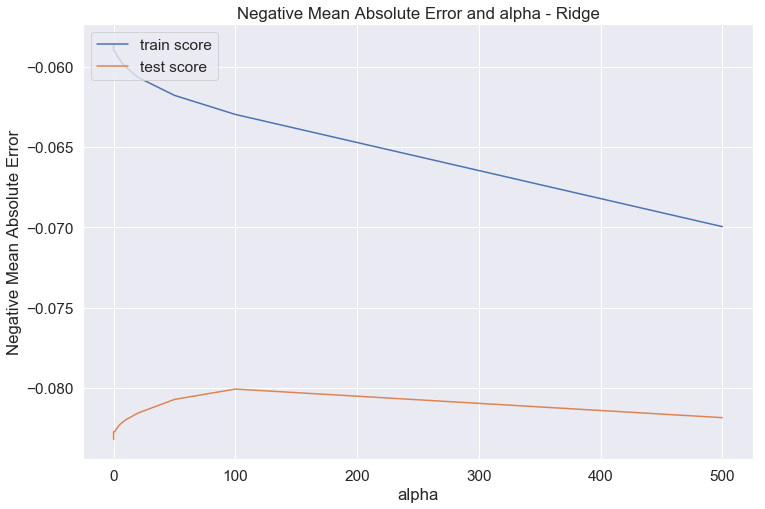

In [ ]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

plt.figure(figsize=(12, 8))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha - Ridge")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [ ]:
# model with optimal alpha:

# Ridge regression:
ridge = Ridge(alpha=100)
ridge.fit(X_train, y_train_initial)

# predict
y_train_pred = ridge.predict(X_train)
RIDGE_R2SCORE = metrics.r2_score(y_true=y_train_initial, y_pred=y_train_pred)
print(metrics.r2_score(y_true=y_train_initial, y_pred=y_train_pred))


0.9466365991173868


In [ ]:
RIDGE_RMSE = np.sqrt(metrics.mean_squared_error(y_train_initial, y_train_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_train_initial, y_train_pred)))

RMSE : 0.09229922095378462


In [ ]:
# Ridge model parameters:

model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
print("Below variables are choosen by Ridge with the correspondage weightage as below:")
list(zip(cols, model_parameters))

Below variables are choosen by Ridge with the correspondage weightage as below:


[('constant', 12.017),
 ('1stFlrSF', 0.032),
 ('2ndFlrSF', 0.03),
 ('3SsnPorch', 0.002),
 ('BedroomAbvGr', -0.003),
 ('BsmtFinSF1', 0.019),
 ('BsmtFinSF2', 0.003),
 ('BsmtFullBath', 0.003),
 ('BsmtHalfBath', -0.002),
 ('BsmtUnfSF', -0.007),
 ('EnclosedPorch', 0.005),
 ('Fireplaces', 0.01),
 ('FullBath', 0.011),
 ('GarageArea', 0.015),
 ('GarageCars', 0.015),
 ('GarageYrBlt', 0.003),
 ('GrLivArea', 0.043),
 ('HalfBath', 0.012),
 ('KitchenAbvGr', -0.013),
 ('LotArea', 0.034),
 ('LotFrontage', 0.007),
 ('LowQualFinSF', 0.001),
 ('MasVnrArea', 0.006),
 ('MiscVal', -0.001),
 ('OpenPorchSF', 0.007),
 ('OverallQual', 0.053),
 ('PoolArea', 0.005),
 ('ScreenPorch', 0.012),
 ('TotRmsAbvGrd', 0.01),
 ('TotalBsmtSF', 0.029),
 ('WoodDeckSF', 0.012),
 ('YearBuilt', 0.022),
 ('YearRemodAdd', 0.01),
 ('TotalSF', 0.043),
 ('PercentLivingtoLot', -0.001),
 ('TotalBath', 0.012),
 ('YearSinceLastRemodel', -0.01),
 ('house_age', -0.022),
 ('HasPool', 0.003),
 ('Has2ndFloor', 0.002),
 ('HasGarage', 0.002),
 

## 2. 3  : Regression model using Lasso:

In [ ]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train_initial) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [ ]:
cv_results_lasso = pd.DataFrame(model_cv.cv_results_)
cv_results_lasso = cv_results_lasso[cv_results_lasso['param_alpha']<=0.02]
cv_results_lasso.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.185062      0.005206              0.0             0.0      0.0001   
1       0.148673      0.030449              0.0             0.0       0.001   
2       0.041960      0.025583              0.0             0.0        0.01   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}           0.912699           0.918648           0.884645   
1   {'alpha': 0.001}           0.916892           0.922373           0.906591   
2    {'alpha': 0.01}           0.906727           0.915530           0.893352   

   split3_test_score       ...         mean_test_score  std_test_score  \
0           0.914207       ...                0.907975        0.012013   
1           0.917023       ...                0.915980        0.005137   
2           0.906591       ...                0.905354        0.007095   

   rank_test_score  split0_train_score  split1_train_score  \
0                2            0.954221            0.954460   
1                1            0.948092            0.948912   
2                3            0.916013            0.912377   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.957754            0.954931            0.955406   
1            0.951433            0.949611            0.950320   
2            0.917083            0.917226            0.916833   

   mean_train_score  std_train_score  
0          0.955354         0.001267  
1          0.949673         0.001149  
2          0.915906         0.001814  

[3 rows x 21 columns]

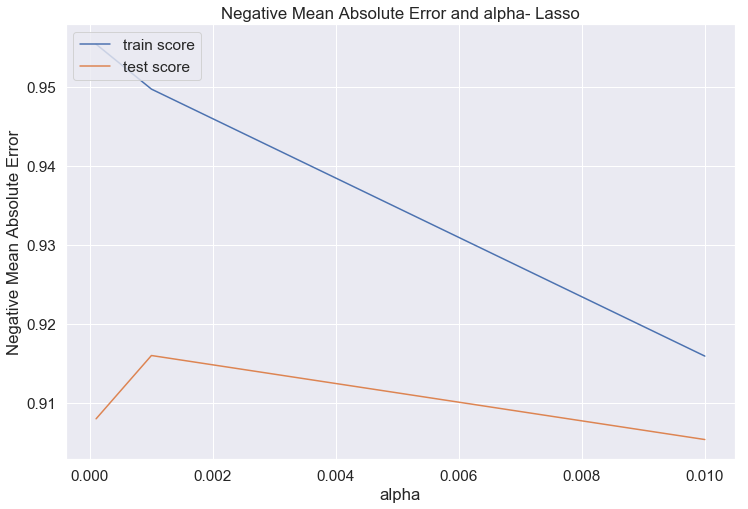

In [ ]:
# plotting mean test and train scoes with alpha 
#cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(12, 8))
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_train_score'])
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha- Lasso")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [ ]:
# model with optimal alpha:

# lasso regression
lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train_initial)

# predict
y_train_pred = lasso.predict(X_train)
LASSO_R2SCORE= metrics.r2_score(y_true=y_train_initial, y_pred=y_train_pred)
print(metrics.r2_score(y_true=y_train_initial, y_pred=y_train_pred))


0.9466618033442136


In [ ]:
LASSO_RMSE = np.sqrt(metrics.mean_squared_error(y_train_initial, y_train_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_train_initial, y_train_pred)))

RMSE : 0.09227742131942587


In [ ]:
# lasso model parameters:

model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
print("Below variables are choosen by Lasso with the correspondage weightage as below:")
list(zip(cols, model_parameters))

Below variables are choosen by Lasso with the correspondage weightage as below:


[('constant', 12.018),
 ('1stFlrSF', 0.025),
 ('2ndFlrSF', 0.028),
 ('3SsnPorch', 0.001),
 ('BedroomAbvGr', -0.003),
 ('BsmtFinSF1', 0.016),
 ('BsmtFinSF2', -0.0),
 ('BsmtFullBath', 0.0),
 ('BsmtHalfBath', -0.001),
 ('BsmtUnfSF', -0.011),
 ('EnclosedPorch', 0.003),
 ('Fireplaces', 0.01),
 ('FullBath', 0.0),
 ('GarageArea', 0.012),
 ('GarageCars', 0.02),
 ('GarageYrBlt', 0.003),
 ('GrLivArea', 0.039),
 ('HalfBath', 0.004),
 ('KitchenAbvGr', -0.015),
 ('LotArea', 0.039),
 ('LotFrontage', 0.004),
 ('LowQualFinSF', 0.0),
 ('MasVnrArea', 0.002),
 ('MiscVal', -0.0),
 ('OpenPorchSF', 0.005),
 ('OverallQual', 0.067),
 ('PoolArea', 0.006),
 ('ScreenPorch', 0.011),
 ('TotRmsAbvGrd', 0.003),
 ('TotalBsmtSF', 0.009),
 ('WoodDeckSF', 0.011),
 ('YearBuilt', 0.022),
 ('YearRemodAdd', 0.019),
 ('TotalSF', 0.085),
 ('PercentLivingtoLot', -0.0),
 ('TotalBath', 0.018),
 ('YearSinceLastRemodel', -0.0),
 ('house_age', -0.036),
 ('HasPool', 0.0),
 ('Has2ndFloor', -0.0),
 ('HasGarage', 0.0),
 ('HasBsmt', -0.

## 2.4 Regression model using ElasticNet:

In [ ]:
elastic = ElasticNet()
# cross validation

# defining the model parameters for elasticnet:

#'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
# 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0]

parametersGrid = {'alpha': [0.0001, 0.001,0.002, 0.005, 0.01,
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
                   'l1_ratio':[0.5,0.6,0.7,0.8,0.9,0.95,0.96,0.98]}

model_cv = GridSearchCV(estimator=elastic, 
                        param_grid= parametersGrid,
                        scoring= 'neg_mean_squared_error', 
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train_initial) 

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:   34.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.002, 0.005, 0.01, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8], 'l1_ratio': [0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.96, 0.98]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=1)

In [ ]:
cv_results_elastic = pd.DataFrame(model_cv.cv_results_)
cv_results_elastic.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.190032      0.015615         0.000000        0.000000      0.0001   
1       0.188563      0.010561         0.000000        0.000000      0.0001   
2       0.186159      0.009159         0.000798        0.000399      0.0001   
3       0.192686      0.004566         0.000996        0.000001      0.0001   
4       0.301152      0.062672         0.000798        0.000399      0.0001   

  param_l1_ratio                              params  split0_test_score  \
0            0.5  {'alpha': 0.0001, 'l1_ratio': 0.5}          -0.013264   
1            0.6  {'alpha': 0.0001, 'l1_ratio': 0.6}          -0.013222   
2            0.7  {'alpha': 0.0001, 'l1_ratio': 0.7}          -0.013185   
3            0.8  {'alpha': 0.0001, 'l1_ratio': 0.8}          -0.013132   
4            0.9  {'alpha': 0.0001, 'l1_ratio': 0.9}          -0.013084   

   split1_test_score  split2_test_score       ...         mean_test_score  \
0          -0.014798          -0.019810       ...               -0.014864   
1          -0.014826          -0.019669       ...               -0.014836   
2          -0.014862          -0.019569       ...               -0.014809   
3          -0.014871          -0.019429       ...               -0.014768   
4          -0.014862          -0.019292       ...               -0.014721   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.002581               37           -0.007377           -0.006962   
1        0.002532               36           -0.007389           -0.006975   
2        0.002503               35           -0.007397           -0.006986   
3        0.002460               34           -0.007406           -0.006996   
4        0.002420               32           -0.007415           -0.007003   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.006620           -0.007296           -0.007131   
1           -0.006633           -0.007305           -0.007141   
2           -0.006645           -0.007313           -0.007155   
3           -0.006655           -0.007323           -0.007168   
4           -0.006663           -0.007332           -0.007178   

   mean_train_score  std_train_score  
0         -0.007077         0.000270  
1         -0.007089         0.000268  
2         -0.007099         0.000267  
3         -0.007109         0.000267  
4         -0.007118         0.000268  

[5 rows x 22 columns]

In [ ]:
model_cv.best_params_

{'alpha': 0.005, 'l1_ratio': 0.5}

In [ ]:
cv_results_elastic2 = cv_results_elastic.join(pd.DataFrame(cv_results_elastic.pop('params').tolist()))
cv_results_elastic2.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_alpha', 'param_l1_ratio', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'mean_train_score', 'std_train_score', 'alpha', 'l1_ratio'],
      dtype='object')

In [ ]:
# Plotting the results:


# plotting
plt.figure(figsize=(18, 12))

plt.subplot(2,2,1)
plt.plot(cv_results_elastic2['param_alpha'], cv_results_elastic2['mean_train_score'])
plt.plot(cv_results_elastic2['param_alpha'], cv_results_elastic2['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha- ElasticNet")
plt.legend(['train score', 'test score'], loc='lower left')


plt.subplot(2,2,2)
plt.plot(cv_results_elastic2['param_l1_ratio'], cv_results_elastic2['mean_train_score'])
plt.plot(cv_results_elastic2['param_l1_ratio'], cv_results_elastic2['mean_test_score'])
plt.xlabel('l1_ratio')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and l1_ratio- ElasticNet")
plt.legend(['train score', 'test score'], loc='lower left')

plt.show()

In [ ]:
#cv_results_lasso = cv_results_lasso[cv_results_lasso['param_alpha']<=0.02]

cv_results_elastic2 = cv_results_elastic2[cv_results_elastic2['param_alpha']<=0.005]
cv_results_elastic2 = cv_results_elastic2[cv_results_elastic2['param_l1_ratio']<=0.5]


# plotting
plt.figure(figsize=(18, 12))

plt.subplot(2,2,1)
plt.plot(cv_results_elastic2['param_alpha'], cv_results_elastic2['mean_train_score'])
plt.plot(cv_results_elastic2['param_alpha'], cv_results_elastic2['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha- ElasticNet")
plt.legend(['train score', 'test score'], loc='lower left')


plt.subplot(2,2,2)
plt.plot(cv_results_elastic2['param_l1_ratio'], cv_results_elastic2['mean_train_score'])
plt.plot(cv_results_elastic2['param_l1_ratio'], cv_results_elastic2['mean_test_score'])
plt.xlabel('l1_ratio')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and l1_ratio- ElasticNet")
plt.legend(['train score', 'test score'], loc='lower left')

plt.show()

In [ ]:
# model with optimal hyper params value:

elastic = ElasticNet(alpha=0.001, l1_ratio=0.85)  
elastic.fit(X_train, y_train_initial)

# predict
y_train_pred = elastic.predict(X_train)
ELASTIC_R2SCORE= metrics.r2_score(y_true=y_train_initial, y_pred=y_train_pred)
print(metrics.r2_score(y_true=y_train_initial, y_pred=y_train_pred))


0.9476401063909443


In [ ]:
ELASTIC_RMSE = np.sqrt(metrics.mean_squared_error(y_train_initial, y_train_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_train_initial, y_train_pred)))

RMSE : 0.09142725132277088


## 2.4 Regression model using GradientBoosting:

In [ ]:
parameters = {
    'loss': ['ls','huber'],
    'n_estimators' : [500,1000,1000],
    'learning_rate': [0.01,0.05,0.1,0.2,0.3],
    "subsample": [0.3, 0.6, 0.9],
    'max_depth': [1,2,4,6],
    "min_samples_split": [2,3,4,8,10,15],
    'min_samples_leaf': [2,4,8,10]
}

gbr = ensemble.GradientBoostingRegressor()
cv = GridSearchCV(gbr, parameters,cv=5, scoring='neg_mean_absolute_error',n_jobs=4)

cv.fit(X_train, y_train_initial)
print("GridSearch score: "+str(cv.best_score_))
print("GridSearch params: ")
print(cv.best_params_)
print(cv.grid_scores_)

In [ ]:
# run grid search
folds = 5
grid_search_GBR = GridSearchCV(GBR1, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = 'r2', 
                               return_train_score=True,                         
                               verbose = 1)

grid_search_GBR.fit(X_train, y_train_initial)

In [ ]:
cv_results = pd.DataFrame(grid_search_GBR.cv_results_)
cv_results.head()

In [ ]:
# # plotting
plt.figure(figsize=(16,6))


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')


In [ ]:
# model with optimal hyper params value:

#elastic = ElasticNet(alpha=0.001, l1_ratio=0.4)  
GBR1.fit(X_train, y_train_initial)

# predict
y_train_pred = GBR1.predict(X_train)
GB_R2SCORE= metrics.r2_score(y_true=y_train_initial, y_pred=y_train_pred)
print(metrics.r2_score(y_true=y_train_initial, y_pred=y_train_pred))


In [ ]:
GB_RMSE = np.sqrt(metrics.mean_squared_error(y_train_initial, y_train_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_train_initial, y_train_pred)))

## 2.5 Regression model using XGBoosting:

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

In [ ]:
XGB_model = XGBRegressor(n_estimators=1000,learning_rate=0.05)
XGB_model.fit(X_train, y_train_initial, early_stopping_rounds=5, 
             eval_set=[(X_train, y_train_initial)], verbose=False)

In [ ]:
# model with optimal hyper params value:

#elastic = ElasticNet(alpha=0.001, l1_ratio=0.4)  
XGB_model.fit(X_train, y_train_initial)

# predict
y_train_pred = XGB_model.predict(X_train)
XGB_R2SCORE= metrics.r2_score(y_true=y_train_initial, y_pred=y_train_pred)
print(metrics.r2_score(y_true=y_train_initial, y_pred=y_train_pred))


In [ ]:
XGB_RMSE = np.sqrt(metrics.mean_squared_error(y_train_initial, y_train_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_train_initial, y_train_pred)))

### 2.3 Comparision of performance of various models:

We will evaluate the model performance based on the RMSE and R2 score for each model:
Mutiple Linear Regression Model, Ridge, Lasso, ElasticNet Model


In [ ]:
data_model = [
     {'Model_Type': 'MLR','RMSE': MLR_RMSE ,'R2_SCORE': MLR_R2SCORE },
     {'Model_Type': 'Ridge', 'RMSE': RIDGE_RMSE, 'R2_SCORE': RIDGE_R2SCORE},
     {'Model_Type': 'Lasso', 'RMSE': LASSO_RMSE, 'R2_SCORE': LASSO_R2SCORE},
     {'Model_Type': 'Elastic', 'RMSE': ELASTIC_RMSE, 'R2_SCORE': ELASTIC_R2SCORE},
     {'Model_Type': 'GBR', 'RMSE': GB_RMSE, 'R2_SCORE': GB_R2SCORE},
     {'Model_Type': 'XGB', 'RMSE': XGB_RMSE, 'R2_SCORE': XGB_R2SCORE}]

model_score = pd.DataFrame(data_model, columns=['Model_Type', 'RMSE', 'R2_SCORE'])

model_score.head()

In [ ]:
# let's visualise this model performance in terms of RMSE:

#setting up the figure size for larger picture of the plot:
plt.figure(num=None,figsize=(16,22),facecolor='w',edgecolor='k')
plt.title("Performance Comparision of various models for House Price Prediction")

#Plotting the bar plot for data using matplotlin and seaborn, and specifying required title, x and y axis labels:
plt.subplot(2,2,1)
sns.barplot(data=model_score,x='Model_Type',y='RMSE',palette="rocket")
plt.ylabel("Model Type")
plt.xlabel("RMSE score value")

plt.subplot(2,2,2)
sns.barplot(data=model_score,x='Model_Type',y='R2_SCORE',palette="Set1")
plt.ylabel("Model Type")
plt.xlabel("R2_SCORE value")

plt.show()

In [ ]:
# Let's sort the model based on best RMSE which is the evaluation criteria for the competition:

model_score.sort_values(by=['RMSE'], ascending=True)

### Based upon the above comparision, we will take the Elastic model for the submission.

## Step 3. Submission:



In [ ]:
# Let's make some predictions and submit it, finally:
y_test_pred = elastic.predict(X_test)

submission_elastic = pd.DataFrame()
submission_elastic['Id'] = test_ID
submission_elastic['SalePrice'] = y_test_pred 

#submission_elastic['SalePrice'] = np.exp(submission_elastic['SalePrice']) 
submission_elastic['SalePrice'] = np.expm1(submission_elastic['SalePrice']) 

submission_elastic.to_csv('elastic_ashu.csv',index=False)


#### Thanks for your time, hope this kernel was helpful and explanatory. Do give me feedback and please upvote if it has helped you !!